# **Unit4 - Unsupervised Learning Project Guideline**

    -For this project you'll dig into a large amount of text and apply most of what you've covered in this unit and in the course so far.

    -First, pick a set of texts. This can be either a series of novels, chapters, or articles. Anything you'd like. It just has to have multiple entries of varying characteristics. At least 100 should be good. There should also be at least 10 different authors, but try to keep the texts related (either all on the same topic of from the same branch of literature - something to make classification a bit more difficult than obviously different subjects).

    -This capstone can be an extension of your NLP challenge if you wish to use the same corpus. If you found problems with that data set that limited your analysis, however, it may be worth using what you learned to choose a new corpus. Reserve 25% of your corpus as a test set.

    -The first technique is to create a series of clusters. Try several techniques and pick the one you think best represents your data. Make sure there is a narrative and reasoning around why you have chosen the given clusters. Are authors consistently grouped into the same cluster?

    -Next, perform some unsupervised feature generation and selection using the techniques covered in this unit and elsewhere in the course. Using those features then build models to attempt to classify your texts by author. Try different permutations of unsupervised and supervised techniques to see which combinations have the best performance.

    -Lastly return to your holdout group. Does your clustering on those members perform as you'd expect? Have your clusters remained stable or changed dramatically? What about your model? Is it's performance consistent?

    -If there is a divergence in the relative stability of your model and your clusters, delve into why.

    -Your end result should be a write up of how clustering and modeling compare for classifying your texts. What are the advantages of each? Why would you want to use one over the other? Approximately 3-5 pages is a good length for your write up, and remember to include visuals to help tell your story!
    
    

----

----


# **Can a song's lyrics predict it's genre?** 
Can an unsupervised learning predict the genre of a song?

### Author: Charla Gaddy


***Introduction:***
In this unsupervised capstone, tries to predict the genre of a song and also 
the genre of the songs split into sentences. Several natural language processing 
and supervised learing algorithmn and techniques will be applied to see how well 
the vairance is explained.  

## Part I - Data scraping and cleaning
_Data scraping_
        - BeautifulSoup was used to capture artist songs from the 
        website www.lyricsfreak.com.  The dataset has 6 genres.  
        Each genre has 5 artist and 10 songs per artist.  The songs 
        were broken into sentence and put in to a dataframe.
          
_Data cleaning_
        - Regex 

## Part II - Prediction of genre by sentences
_Preprocessing for sentences_
        - Classification of genre based on the sentences 
        of song using bag of words features & tf-idf
        
_Supervised learning (fit the model then test the model with the 25% holdout)_
        - algorithms on BoWs
        - algorithms on tf-idf
        
_Unsupervised learning (get the model then test the model with the 25% holdout)_
        - Clustering algorithm to predict the genre using bag of words & tf-idf
        
## Part III - Prediction of genre by songs
_Preprocessing Songs_
        - Classification of genre based on the whole song using tf-idf and BOWs
        
_Supervised learning_
        - algorithms on BoWs
        - algorithms on tf-idf features
        
_Unsupervised learning_
        - Clustering algorithm to predict the genre using tf-idf
        
        
## Part IV - Dimensionality reduction    
_Dimension Reduction_
        - Latent Semantic Analysis (LSA) and Latent DirichletAllocation(LDA)
        on the whole song to genre 
            - run Kmeans unsupervised learning with LSA 
            - get the topics and the words for each topic.
            - Cluster the top words for Kmeans, LSA and LDA in a table 
            and see if they select some common words.


***The Dataset:***

BeautifulSoup was used to capture artist songs from the website www.lyricsfreak.com.  The dataset has 6 genres.  Each genre has 5 artist and 10 songs per artist.  The songs were split into sentence and put in to a dataframe.


----

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle
import pandas as pd
import numpy as np
import math
import os
os.getcwd()
from collections import Counter

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# **Part I - Data scraping and cleaning**

_get all the songs from the website and store them in a data frame_

_use regex to clean the data_

In [2]:
# Scrapes transcript data 
def url_to_songs(url):
    '''Returns song data specifically from https://www.lyricsfreak.com'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "html")

    text = [p.text for p in soup.find(class_="js-share-text").find_all('div')]
    print(url)
    return text

# URLs of transcripts
urls1 = ['https://www.lyricsfreak.com/a/ariana+grande/winter+things_21105132.html',
'https://www.lyricsfreak.com/a/ariana+grande/rolling+in+the+deep_20980981.html',
'https://www.lyricsfreak.com/a/ariana+grande/pink+champagne_21010018.html',
'https://www.lyricsfreak.com/a/ariana+grande/the+way_21058650.html',
'https://www.lyricsfreak.com/a/ariana+grande/give+it+up_20979866.html',
'https://www.lyricsfreak.com/a/ariana+grande/fake+smile_21605123.html',
'https://www.lyricsfreak.com/a/ariana+grande/honeymoon+avenue_20996813.html',
'https://www.lyricsfreak.com/a/ariana+grande/greedy_21108776.html',
'https://www.lyricsfreak.com/a/ariana+grande/almost+is+never+enough_21065690.html',
'https://www.lyricsfreak.com/a/ariana+grande/the+way_21058650.html']

urls2 = ['https://www.lyricsfreak.com/e/ellie+goulding/nobodys+crying_21035047.html',
'https://www.lyricsfreak.com/e/ellie+goulding/lights_20874433.html',
'https://www.lyricsfreak.com/e/ellie+goulding/bittersweet_21048545.html',
'https://www.lyricsfreak.com/e/ellie+goulding/your+song_20895401.html',
'https://www.lyricsfreak.com/e/ellie+goulding/tessellate_21062934.html',
'https://www.lyricsfreak.com/e/ellie+goulding/burn_21064022.html',
'https://www.lyricsfreak.com/e/ellie+goulding/you+my+everything_21064659.html',
'https://www.lyricsfreak.com/e/ellie+goulding/atlantis_21047078.html',
'https://www.lyricsfreak.com/e/ellie+goulding/your+biggest+mistake_20874438.html',
'https://www.lyricsfreak.com/e/ellie+goulding/without+your+love_21055516.html']
        
urls3 = ['https://www.lyricsfreak.com/j/jonas+brothers/you+just+dont+know+it_20367603.html',
'https://www.lyricsfreak.com/j/jonas+brothers/6+minutes_20367583.html',
'https://www.lyricsfreak.com/j/jonas+brothers/time+for+me+to+fly_20367553.html',
'https://www.lyricsfreak.com/j/jonas+brothers/just+friends_20436733.html',
'https://www.lyricsfreak.com/j/jonas+brothers/games_20441443.html',
'https://www.lyricsfreak.com/j/jonas+brothers/year+3000_20367563.html',
'https://www.lyricsfreak.com/j/jonas+brothers/when+you+look+me+in+the+eyes_20436713.html',
'https://www.lyricsfreak.com/j/jonas+brothers/inseparable_20436723.html',
'https://www.lyricsfreak.com/j/jonas+brothers/hold+on_20420023.html',
'https://www.lyricsfreak.com/j/jonas+brothers/a+little+bit+longer_20662710.html']
        
urls4 = ['https://www.lyricsfreak.com/p/pnk/waiting+for+love_10206083.html',
'https://www.lyricsfreak.com/p/pnk/blow+me_21023261.html',
'https://www.lyricsfreak.com/p/pnk/fuckin+perfect_20985200.html',
'https://www.lyricsfreak.com/p/pnk/dear+diary_20108559.html',
'https://www.lyricsfreak.com/p/pnk/love+is+such+a+crazy+thing_20108550.html',
'https://www.lyricsfreak.com/p/pnk/trouble_10206077.html',
'https://www.lyricsfreak.com/p/pnk/let+me+let+you+know_20108549.html',
'https://www.lyricsfreak.com/p/pnk/hell+wit+ya_20108546.html',
'https://www.lyricsfreak.com/p/pnk/delirium_10206094.html',
'https://www.lyricsfreak.com/p/pnk/18+wheeler_20108558.html']
        
urls5 = ['https://www.lyricsfreak.com/j/justin+timberlake/until+the+end+of+time_20373473.html',
'https://www.lyricsfreak.com/j/justin+timberlake/rock+your+body_20076758.html',
'https://www.lyricsfreak.com/j/justin+timberlake/sexyback_20373393.html',
'https://www.lyricsfreak.com/j/justin+timberlake/cry+me+a+river_20076751.html',
'https://www.lyricsfreak.com/j/justin+timberlake/never+again_20076755.html',
'https://www.lyricsfreak.com/j/justin+timberlake/this+i+promise+you_20315796.html',
'https://www.lyricsfreak.com/j/justin+timberlake/senorita_20076759.html',
'https://www.lyricsfreak.com/j/justin+timberlake/nothin+else_20076756.html',
'https://www.lyricsfreak.com/j/justin+timberlake/lets+take+a+ride_20076753.html',
'https://www.lyricsfreak.com/j/justin+timberlake/im+lovin+it_10155435.html']

urls6 = ['https://www.lyricsfreak.com/m/motley+crue/rodeo_20096274.html',
'https://www.lyricsfreak.com/m/motley+crue/rock+n+roll+junkie_20302661.html',
'https://www.lyricsfreak.com/m/motley+crue/if+i+die+tomorrow_20193701.html',
'https://www.lyricsfreak.com/m/motley+crue/anarchy+in+the+u+k_20096207.html',
'https://www.lyricsfreak.com/m/motley+crue/louder+than+hell_20096398.html',
'https://www.lyricsfreak.com/m/motley+crue/welcome+to+the+numb_20096343.html',
'https://www.lyricsfreak.com/m/motley+crue/bad+boy+boogie_20096266.html',
'https://www.lyricsfreak.com/m/motley+crue/merry+go+round_20096408.html',
'https://www.lyricsfreak.com/m/motley+crue/anybody+out+there_20096251.html',
'https://www.lyricsfreak.com/m/motley+crue/misunderstood_20096338.html']
        
urls7 = ['https://www.lyricsfreak.com/q/queen/the+hero_20112380.html',
'https://www.lyricsfreak.com/q/queen/the+great+pretender_20112440.html',
'https://www.lyricsfreak.com/q/queen/stone+cold+crazy_20112658.html',
'https://www.lyricsfreak.com/q/queen/seven+seas+of+rhye_20112558.html',
'https://www.lyricsfreak.com/q/queen/scandal_20112581.html',
'https://www.lyricsfreak.com/q/queen/the+show+must+go+on_20112470.html',
'https://www.lyricsfreak.com/q/queen/the+prophets+song_20112608.html',
'https://www.lyricsfreak.com/q/queen/the+millionaire+waltz_20112301.html',
'https://www.lyricsfreak.com/q/queen/somebody+to+love_20112299.html',
'https://www.lyricsfreak.com/q/queen/save+me_20112406.html']
        
urls8 = ['https://www.lyricsfreak.com/p/pink+floyd/wish+you+were+here_20108843.html',
'https://www.lyricsfreak.com/p/pink+floyd/when+the+tigers+broke+free_20108840.html',
'https://www.lyricsfreak.com/p/pink+floyd/the+show+must+go+on_20108798.html',
'https://www.lyricsfreak.com/p/pink+floyd/see+emily+play_20108721.html',
'https://www.lyricsfreak.com/p/pink+floyd/coming+back+to+life_20108635.html',
'https://www.lyricsfreak.com/p/pink+floyd/what+do+you+want+from+me_20108743.html',
'https://www.lyricsfreak.com/p/pink+floyd/time_20108616.html',
'https://www.lyricsfreak.com/p/pink+floyd/set+the+controls+for+the+heart+of+the+sun_20108729.html',
'https://www.lyricsfreak.com/p/pink+floyd/bring+the+boys+back+home_20108778.html',
'https://www.lyricsfreak.com/p/pink+floyd/dogs_20108596.html']
        
urls9 = ['https://www.lyricsfreak.com/m/metallica/whiskey+in+the+jar_10178775.html',
'https://www.lyricsfreak.com/m/metallica/wherever+i+may+roam_20092060.html',
'https://www.lyricsfreak.com/m/metallica/welcome+home+sanitarium_20342704.html',
'https://www.lyricsfreak.com/m/metallica/until+it+sleeps_20092075.html',
'https://www.lyricsfreak.com/m/metallica/the+judas+kiss_20753039.html',
'https://www.lyricsfreak.com/m/metallica/the+unforgiven+ii_20092122.html',
'https://www.lyricsfreak.com/m/metallica/the+small+hours_20092022.html',
'https://www.lyricsfreak.com/m/metallica/battery_20092039.html',
'https://www.lyricsfreak.com/m/metallica/attitude_20092111.html',
'https://www.lyricsfreak.com/m/metallica/cyanide_20753040.html']
        
urls10 = ['https://www.lyricsfreak.com/a/ac+dc/aint+no+fun_10001729.html',
'https://www.lyricsfreak.com/a/ac+dc/are+you+ready_20003384.html',
'https://www.lyricsfreak.com/a/ac+dc/back+in+black_20003193.html',
'https://www.lyricsfreak.com/a/ac+dc/badlands_20003233.html',
'https://www.lyricsfreak.com/a/ac+dc/cyberspace_20178978.html',
'https://www.lyricsfreak.com/a/ac+dc/you+shook+me+all+night+long_10001927.html',
'https://www.lyricsfreak.com/a/ac+dc/baby+please+dont+go_20003155.html',
'https://www.lyricsfreak.com/a/ac+dc/dirty+deeds+done+dirt+cheap_20003331.html',
'https://www.lyricsfreak.com/a/ac+dc/ride+on_20003422.html',
'https://www.lyricsfreak.com/a/ac+dc/t+n+t_20003280.html']
    
urls11 = ['https://www.lyricsfreak.com/b/bob+marley/zion+train_10044013.html',
'https://www.lyricsfreak.com/b/bob+marley/three+little+birds_20021728.html',
'https://www.lyricsfreak.com/b/bob+marley/i+shot+the+sheriff_20021744.html',
'https://www.lyricsfreak.com/b/bob+marley/waiting+in+vain_20021730.html',
'https://www.lyricsfreak.com/b/bob+marley/easy+skanking_20021732.html',
'https://www.lyricsfreak.com/b/bob+marley/thank+you+lord_20644264.html',
'https://www.lyricsfreak.com/b/bob+marley/i+know+a+place_20525674.html',
'https://www.lyricsfreak.com/b/bob+marley/one+drop_20021814.html',
'https://www.lyricsfreak.com/b/bob+marley/get+up+stand+up_20021743.html',
'https://www.lyricsfreak.com/b/bob+marley/exodus_20021711.html']
        
urls12 = ['https://www.lyricsfreak.com/b/burning+spear/christopher+columbus_21005458.html',
'https://www.lyricsfreak.com/b/burning+spear/call+on+jah_20817811.html',
'https://www.lyricsfreak.com/b/burning+spear/black+disciples_21005468.html',
'https://www.lyricsfreak.com/b/burning+spear/my+roots_20803443.html',
'https://www.lyricsfreak.com/b/burning+spear/tumble+down_20828862.html',
'https://www.lyricsfreak.com/b/burning+spear/when+jah+call_20816926.html',
'https://www.lyricsfreak.com/b/burning+spear/any+river_21005460.html',
'https://www.lyricsfreak.com/b/burning+spear/come+in+peace_21005475.html',
'https://www.lyricsfreak.com/b/burning+spear/shes+mine_20215727.html',
'https://www.lyricsfreak.com/b/burning+spear/throw+down+your+arms_21343985.html',]
        
urls13 = ['https://www.lyricsfreak.com/s/steel+pulse/your+house_20354183.html',
'https://www.lyricsfreak.com/s/steel+pulse/chant+a+psalm_20166717.html',
'https://www.lyricsfreak.com/s/steel+pulse/prodigal+son_20295442.html',
'https://www.lyricsfreak.com/s/steel+pulse/reggae+fever_20304765.html',
'https://www.lyricsfreak.com/s/steel+pulse/steppin+out_20324131.html',
'https://www.lyricsfreak.com/s/steel+pulse/blasphemy_20156854.html',
'https://www.lyricsfreak.com/s/steel+pulse/a+who+responsible_20340043.html',
'https://www.lyricsfreak.com/s/steel+pulse/blessed+is+the+man_20155286.html',
'https://www.lyricsfreak.com/s/steel+pulse/drug+squad_20187577.html',
'https://www.lyricsfreak.com/s/steel+pulse/darker+than+blue_21215963.html']
    
urls14 = ['https://www.lyricsfreak.com/b/beres+hammond/let+it+go_20246248.html',
'https://www.lyricsfreak.com/b/beres+hammond/cant+get+enough_20172791.html',
'https://www.lyricsfreak.com/b/beres+hammond/good+love_20203963.html',
'https://www.lyricsfreak.com/b/beres+hammond/all+is+well_20238914.html',
'https://www.lyricsfreak.com/b/beres+hammond/sweet+lies_20348939.html',
'https://www.lyricsfreak.com/b/beres+hammond/tempted+to+touch_21389635.html',
'https://www.lyricsfreak.com/b/beres+hammond/groovy+little+thing_21390261.html',
'https://www.lyricsfreak.com/b/beres+hammond/can+you+play+some+more_20826078.html',
'https://www.lyricsfreak.com/b/beres+hammond/rose+garden_20305303.html',
'https://www.lyricsfreak.com/b/beres+hammond/what+a+life_20340973.html']
        
urls15 = ['https://www.lyricsfreak.com/b/buju+banton/murderer_20262491.html',
'https://www.lyricsfreak.com/b/buju+banton/champion_20166208.html',
'https://www.lyricsfreak.com/b/buju+banton/chuck+it+so_20165482.html',
'https://www.lyricsfreak.com/b/buju+banton/destiny_20190457.html',
'https://www.lyricsfreak.com/b/buju+banton/hills+and+valleys_20214484.html',
'https://www.lyricsfreak.com/b/buju+banton/wanna+be+loved_20345385.html',
'https://www.lyricsfreak.com/b/buju+banton/circumstances_20175073.html',
'https://www.lyricsfreak.com/b/buju+banton/love+sponge_20249536.html',
'https://www.lyricsfreak.com/b/buju+banton/how+could+you_20222154.html',
'https://www.lyricsfreak.com/b/buju+banton/well+be+alright_20828864.html']
    
urls16 = ['https://www.lyricsfreak.com/j/jill+scott/the+way_20071430.html',
'https://www.lyricsfreak.com/j/jill+scott/cross+my+mind_20176169.html',
'https://www.lyricsfreak.com/j/jill+scott/golden_20205355.html',
'https://www.lyricsfreak.com/j/jill+scott/hate+on+me_20651459.html',
'https://www.lyricsfreak.com/j/jill+scott/im+not+afraid_20260342.html',
'https://www.lyricsfreak.com/j/jill+scott/cant+explain+42nd+street+happenstance_20174220.html',
'https://www.lyricsfreak.com/j/jill+scott/lovely+day_20999859.html',     
'https://www.lyricsfreak.com/j/jill+scott/blessed_20916621.html',
'https://www.lyricsfreak.com/j/jill+scott/i+love+you_20975580.html',
'https://www.lyricsfreak.com/j/jill+scott/lovely+day_20999859.html']  
        
urls17 = ['https://www.lyricsfreak.com/m/mary+j+blige/no+more+drama_20090189.html',
'https://www.lyricsfreak.com/m/mary+j+blige/family+affair_20090184.html',
'https://www.lyricsfreak.com/m/mary+j+blige/i+can+love+you_20090138.html',
'https://www.lyricsfreak.com/m/mary+j+blige/love+no+limit_20090158.html',
'https://www.lyricsfreak.com/m/mary+j+blige/real+love_20090165.html',
'https://www.lyricsfreak.com/m/mary+j+blige/all+my+love_20237840.html',
'https://www.lyricsfreak.com/m/mary+j+blige/you+remind+me_20090174.html',
'https://www.lyricsfreak.com/m/mary+j+blige/best+of+my+love_20837726.html',
'https://www.lyricsfreak.com/m/mary+j+blige/dance+for+me_20183951.html',     
'https://www.lyricsfreak.com/m/mary+j+blige/got+to+be+real_20488318.html']
    
urls18 = ['https://www.lyricsfreak.com/j/john+legend/used+to+love+u_10152517.html',
'https://www.lyricsfreak.com/j/john+legend/stay+with+you_10152519.html',
'https://www.lyricsfreak.com/j/john+legend/green+light_20748618.html',
'https://www.lyricsfreak.com/j/john+legend/so+high_10152525.html',
'https://www.lyricsfreak.com/j/john+legend/i+can+change_20458886.html',
'https://www.lyricsfreak.com/j/john+legend/take+me+away_20763861.html',
'https://www.lyricsfreak.com/j/john+legend/glory_21091529.html',
'https://www.lyricsfreak.com/j/john+legend/you+i_21065311.html',
'https://www.lyricsfreak.com/j/john+legend/all+of+me_21065303.html',
'https://www.lyricsfreak.com/j/john+legend/if+this+world+were+mine+feat+imani+uzuri_20201905.html']

    
urls19 = ['https://www.lyricsfreak.com/m/marvin+gaye/you+are+everything_20354888.html',
'https://www.lyricsfreak.com/m/marvin+gaye/whats+happening+brother_20340856.html',
'https://www.lyricsfreak.com/m/marvin+gaye/whats+goin+on_20340769.html',
'https://www.lyricsfreak.com/m/marvin+gaye/if+this+world+were+mine_20201904.html',
'https://www.lyricsfreak.com/m/marvin+gaye/aint+no+mountain+high+enough_20281030.html',
'https://www.lyricsfreak.com/m/marvin+gaye/i+heard+it+through+the+grapevine_20488463.html',
'https://www.lyricsfreak.com/m/marvin+gaye/sexual+healing_20350726.html',
'https://www.lyricsfreak.com/m/marvin+gaye/aint+nothin+like+the+real+thing_20281585.html',
'https://www.lyricsfreak.com/m/marvin+gaye/sitting+on+the+dock+of+the+bay_20613871.html',
'https://www.lyricsfreak.com/m/marvin+gaye/aint+no+sunshine+when+shes+gone_20613870.html']
    
urls20 = ['https://www.lyricsfreak.com/j/joe/all+the+things_10150758.html',    
'https://www.lyricsfreak.com/j/joe/more+and+more_10150723.html',    
'https://www.lyricsfreak.com/j/joe/i+wanna+know_20072590.html',    
'https://www.lyricsfreak.com/j/joe/no+one+else+comes+close_20072617.html',    
'https://www.lyricsfreak.com/j/joe/dont+wanna+be+a+player_20072605.html',
'https://www.lyricsfreak.com/j/joe/dear+joe_20984953.html',
'https://www.lyricsfreak.com/j/joe/good+girls_20072609.html',
'https://www.lyricsfreak.com/j/joe/if+i+was+your+man_20419663.html',
'https://www.lyricsfreak.com/j/joe/priceless_10150724.html',
'https://www.lyricsfreak.com/j/joe/get+a+little+closer_20072608.html']
 
urls21 = ['https://www.lyricsfreak.com/j/jay+z/99+problems_10147720.html',
'https://www.lyricsfreak.com/j/jay+z/1+900+hustler_20070027.html',
'https://www.lyricsfreak.com/j/jay+z/all+i+need_20070065.html',
'https://www.lyricsfreak.com/j/jay+z/big+pimpin_10147777.html',
'https://www.lyricsfreak.com/j/jay+z/blueprint+2_20070086.html',
'https://www.lyricsfreak.com/j/jay+z/cant+knock+the+hustle_10147781.html',
'https://www.lyricsfreak.com/j/jay+z/dirt+off+your+shoulder_10147717.html',
'https://www.lyricsfreak.com/j/jay+z/girls+girls+girls_10147739.html',
'https://www.lyricsfreak.com/j/jay+z/holy+grail_21064046.html',
'https://www.lyricsfreak.com/j/jay+z/its+alright_10147677.html'] 

urls22 = ['https://www.lyricsfreak.com/j/j+cole/the+autograph_20894859.html',
'https://www.lyricsfreak.com/j/j+cole/cant+get+enough_20978155.html',
'https://www.lyricsfreak.com/j/j+cole/apparently_21091278.html',
'https://www.lyricsfreak.com/j/j+cole/farewell_20894866.html',
'https://www.lyricsfreak.com/j/j+cole/grew+up+fast_21006410.html',
'https://www.lyricsfreak.com/j/j+cole/im+a+fool_21036327.html',
'https://www.lyricsfreak.com/j/j+cole/immortal_21112237.html',
'https://www.lyricsfreak.com/j/j+cole/maine+on+fire_21061308.html',
'https://www.lyricsfreak.com/j/j+cole/mama+told+me_21028694.html',
'https://www.lyricsfreak.com/j/j+cole/sparks+will+fly_21063404.html']   

urls23 = ['https://www.lyricsfreak.com/m/missy+elliott/lose+control_10181683.html',
'https://www.lyricsfreak.com/m/missy+elliott/get+your+freak+on_10181711.html',
'https://www.lyricsfreak.com/m/missy+elliott/funky+fresh+dressed_20094352.html',
'https://www.lyricsfreak.com/m/missy+elliott/work+it_10181709.html',
'https://www.lyricsfreak.com/m/missy+elliott/nothing+out+there+for+me_20094356.html',
'https://www.lyricsfreak.com/m/missy+elliott/why+you+hurt+me_20094347.html',
'https://www.lyricsfreak.com/m/missy+elliott/cant+stop_20485655.html',
'https://www.lyricsfreak.com/m/missy+elliott/hit+em+wit+da+hee_20094338.html',
'https://www.lyricsfreak.com/m/missy+elliott/shake+your+pom+pom_20744752.html',
'https://www.lyricsfreak.com/m/missy+elliott/pep+rally_21106592.html'] 

urls24 = ['https://www.lyricsfreak.com/q/queen+latifah/wrath+of+my+madness_10237180.html',
'https://www.lyricsfreak.com/q/queen+latifah/weekend+love_20342433.html',
'https://www.lyricsfreak.com/q/queen+latifah/unity_20801548.html',
'https://www.lyricsfreak.com/q/queen+latifah/black+hand+side_21206131.html',
'https://www.lyricsfreak.com/q/queen+latifah/do+your+thing+feat+mario+winans_20192592.html',
'https://www.lyricsfreak.com/q/queen+latifah/fly+girl_10237192.html',
'https://www.lyricsfreak.com/q/queen+latifah/evil+that+men+do_20112735.html',
'https://www.lyricsfreak.com/q/queen+latifah/hard+times_20607835.html',
'https://www.lyricsfreak.com/q/queen+latifah/just+another+day_20226384.html',
'https://www.lyricsfreak.com/q/queen+latifah/you+cant+stop+the+beat_21363365.html']     

urls25 = ['https://www.lyricsfreak.com/e/eve/tambourine_20429583.html',
'https://www.lyricsfreak.com/e/eve/let+me+blow+ya+mind_20051941.html',
'https://www.lyricsfreak.com/e/eve/aint+got+no+dough_20051922.html',
'https://www.lyricsfreak.com/e/eve/double+r+what_10110879.html',
'https://www.lyricsfreak.com/e/eve/got+what+you+need_20051939.html',
'https://www.lyricsfreak.com/e/eve/cowboy_20051936.html',
'https://www.lyricsfreak.com/e/eve/as+i+grow_10110882.html',
'https://www.lyricsfreak.com/e/eve/eve+of+destruction_20051952.html',
'https://www.lyricsfreak.com/e/eve/hey+yall_10110867.html',
'https://www.lyricsfreak.com/e/eve/love+is+blind_10110922.html']   
                
urls26 = ['https://www.lyricsfreak.com/y/yolanda+adams/the+prayer_20531696.html',
'https://www.lyricsfreak.com/y/yolanda+adams/the+battle+is+not+yours_20888225.html',
'https://www.lyricsfreak.com/y/yolanda+adams/miracles+and+blessings_20648015.html',
'https://www.lyricsfreak.com/y/yolanda+adams/i+believe_20157162.html',
'https://www.lyricsfreak.com/y/yolanda+adams/be+blessed_20531707.html',
'https://www.lyricsfreak.com/y/yolanda+adams/just+a+prayer+away_20686626.html',
'https://www.lyricsfreak.com/y/yolanda+adams/forever+with+me_20809679.html',
'https://www.lyricsfreak.com/y/yolanda+adams/you+make+me+feel+brand+new_21432645.html',
'https://www.lyricsfreak.com/y/yolanda+adams/victory_20531694.html',
'https://www.lyricsfreak.com/y/yolanda+adams/through+the+storm_20690522.html']
 
urls27 = ['https://www.lyricsfreak.com/k/kirk+franklin/stomp_20321195.html',
'https://www.lyricsfreak.com/k/kirk+franklin/sweet+spirit_20685625.html',
'https://www.lyricsfreak.com/k/kirk+franklin/the+storm+is+over+now_20326356.html',
'https://www.lyricsfreak.com/k/kirk+franklin/why+we+sing_20342270.html',
'https://www.lyricsfreak.com/k/kirk+franklin/afterwhile_20370483.html',
'https://www.lyricsfreak.com/k/kirk+franklin/dont+cry_20184308.html',
'https://www.lyricsfreak.com/k/kirk+franklin/down+by+the+riverside_20631353.html',
'https://www.lyricsfreak.com/k/kirk+franklin/faith_20201737.html',
'https://www.lyricsfreak.com/k/kirk+franklin/free_20495396.html',
'https://www.lyricsfreak.com/k/kirk+franklin/go+tell+it+on+the+mountain_20495395.html']
 
urls28 = ['https://www.lyricsfreak.com/m/mary+mary/dirt_20761949.html',
'https://www.lyricsfreak.com/m/mary+mary/cant+give+up+now_20090206.html',
'https://www.lyricsfreak.com/m/mary+mary/wade+in+the+water_20090217.html',
'https://www.lyricsfreak.com/m/mary+mary/catch+me_20908237.html',
'https://www.lyricsfreak.com/m/mary+mary/believer_20422693.html',
'https://www.lyricsfreak.com/m/mary+mary/yesterday_20422733.html',
'https://www.lyricsfreak.com/m/mary+mary/shackles_10176366.html',
'https://www.lyricsfreak.com/m/mary+mary/joy_20090210.html',
'https://www.lyricsfreak.com/m/mary+mary/what+a+friend_10176365.html',
'https://www.lyricsfreak.com/m/mary+mary/go+get+it_21014874.html']
 
urls29 = ['https://www.lyricsfreak.com/k/kurt+carr/i+almost+let+go_20852253.html',
'https://www.lyricsfreak.com/k/kurt+carr/awesome+wonder_20494709.html',
'https://www.lyricsfreak.com/k/kurt+carr/for+every+mountain_10160441.html',
'https://www.lyricsfreak.com/k/kurt+carr/god+blocked+it_10160453.html',
'https://www.lyricsfreak.com/k/kurt+carr/in+the+sanctuary_20734545.html',
'https://www.lyricsfreak.com/k/kurt+carr/set+the+atmosphere_20494700.html',
'https://www.lyricsfreak.com/k/kurt+carr/been+so+good_10160447.html',
'https://www.lyricsfreak.com/k/kurt+carr/we+offer+you+praise_20494696.html',
'https://www.lyricsfreak.com/k/kurt+carr/if+it+wasnt+for+your+grace_10160444.html',
'https://www.lyricsfreak.com/k/kurt+carr/psalm+68+let+our+god+arise_20494702.html']
 
urls30 = ['https://www.lyricsfreak.com/d/donnie+mcclurkin/total+praise_20804491.html',
'https://www.lyricsfreak.com/d/donnie+mcclurkin/i+am_20650241.html',
'https://www.lyricsfreak.com/d/donnie+mcclurkin/hail+jesus+your+my+king_20636640.html',
'https://www.lyricsfreak.com/d/donnie+mcclurkin/ooh+child_20657555.html',
'https://www.lyricsfreak.com/d/donnie+mcclurkin/just+a+little+talk+with+jesus_21228319.html',
'https://www.lyricsfreak.com/d/donnie+mcclurkin/ill+trust+you+lord_20238761.html',
'https://www.lyricsfreak.com/d/donnie+mcclurkin/we+fall+down+reprisealtar+call_20960464.html',
'https://www.lyricsfreak.com/d/donnie+mcclurkin/wait+on+the+lord_20782699.html',
'https://www.lyricsfreak.com/d/donnie+mcclurkin/stand_20322197.html',
'https://www.lyricsfreak.com/d/donnie+mcclurkin/lift+him+up_21229925.html']   

In [3]:
# Actually request transcripts 
# (takes a few minutes to run)
lyrics1 = [url_to_songs(u) for u in urls1]
lyrics2 = [url_to_songs(u) for u in urls2]
lyrics3 = [url_to_songs(u) for u in urls3]
lyrics4 = [url_to_songs(u) for u in urls4]
lyrics5 = [url_to_songs(u) for u in urls5]
lyrics6 = [url_to_songs(u) for u in urls6]
lyrics7 = [url_to_songs(u) for u in urls7]
lyrics8 = [url_to_songs(u) for u in urls8]
lyrics9 = [url_to_songs(u) for u in urls9]
lyrics10 = [url_to_songs(u) for u in urls10]
lyrics11 = [url_to_songs(u) for u in urls11]
lyrics12 = [url_to_songs(u) for u in urls12]
lyrics13 = [url_to_songs(u) for u in urls13]
lyrics14 = [url_to_songs(u) for u in urls14]
lyrics15 = [url_to_songs(u) for u in urls15]
lyrics16 = [url_to_songs(u) for u in urls16]
lyrics17 = [url_to_songs(u) for u in urls17]
lyrics18 = [url_to_songs(u) for u in urls18]
lyrics19 = [url_to_songs(u) for u in urls19]
lyrics20 = [url_to_songs(u) for u in urls20]
lyrics21 = [url_to_songs(u) for u in urls21]
lyrics22 = [url_to_songs(u) for u in urls22]
lyrics23 = [url_to_songs(u) for u in urls23]
lyrics24 = [url_to_songs(u) for u in urls24]
lyrics25 = [url_to_songs(u) for u in urls25]
lyrics26 = [url_to_songs(u) for u in urls26]
lyrics27 = [url_to_songs(u) for u in urls27]
lyrics28 = [url_to_songs(u) for u in urls28]
lyrics29 = [url_to_songs(u) for u in urls29]
lyrics30 = [url_to_songs(u) for u in urls30]

https://www.lyricsfreak.com/a/ariana+grande/winter+things_21105132.html
https://www.lyricsfreak.com/a/ariana+grande/rolling+in+the+deep_20980981.html
https://www.lyricsfreak.com/a/ariana+grande/pink+champagne_21010018.html
https://www.lyricsfreak.com/a/ariana+grande/the+way_21058650.html
https://www.lyricsfreak.com/a/ariana+grande/give+it+up_20979866.html
https://www.lyricsfreak.com/a/ariana+grande/fake+smile_21605123.html
https://www.lyricsfreak.com/a/ariana+grande/honeymoon+avenue_20996813.html
https://www.lyricsfreak.com/a/ariana+grande/greedy_21108776.html
https://www.lyricsfreak.com/a/ariana+grande/almost+is+never+enough_21065690.html
https://www.lyricsfreak.com/a/ariana+grande/the+way_21058650.html
https://www.lyricsfreak.com/e/ellie+goulding/nobodys+crying_21035047.html
https://www.lyricsfreak.com/e/ellie+goulding/lights_20874433.html
https://www.lyricsfreak.com/e/ellie+goulding/bittersweet_21048545.html
https://www.lyricsfreak.com/e/ellie+goulding/your+song_20895401.html
https:

https://www.lyricsfreak.com/b/burning+spear/come+in+peace_21005475.html
https://www.lyricsfreak.com/b/burning+spear/shes+mine_20215727.html
https://www.lyricsfreak.com/b/burning+spear/throw+down+your+arms_21343985.html
https://www.lyricsfreak.com/s/steel+pulse/your+house_20354183.html
https://www.lyricsfreak.com/s/steel+pulse/chant+a+psalm_20166717.html
https://www.lyricsfreak.com/s/steel+pulse/prodigal+son_20295442.html
https://www.lyricsfreak.com/s/steel+pulse/reggae+fever_20304765.html
https://www.lyricsfreak.com/s/steel+pulse/steppin+out_20324131.html
https://www.lyricsfreak.com/s/steel+pulse/blasphemy_20156854.html
https://www.lyricsfreak.com/s/steel+pulse/a+who+responsible_20340043.html
https://www.lyricsfreak.com/s/steel+pulse/blessed+is+the+man_20155286.html
https://www.lyricsfreak.com/s/steel+pulse/drug+squad_20187577.html
https://www.lyricsfreak.com/s/steel+pulse/darker+than+blue_21215963.html
https://www.lyricsfreak.com/b/beres+hammond/let+it+go_20246248.html
https://www.lyr

https://www.lyricsfreak.com/q/queen+latifah/fly+girl_10237192.html
https://www.lyricsfreak.com/q/queen+latifah/evil+that+men+do_20112735.html
https://www.lyricsfreak.com/q/queen+latifah/hard+times_20607835.html
https://www.lyricsfreak.com/q/queen+latifah/just+another+day_20226384.html
https://www.lyricsfreak.com/q/queen+latifah/you+cant+stop+the+beat_21363365.html
https://www.lyricsfreak.com/e/eve/tambourine_20429583.html
https://www.lyricsfreak.com/e/eve/let+me+blow+ya+mind_20051941.html
https://www.lyricsfreak.com/e/eve/aint+got+no+dough_20051922.html
https://www.lyricsfreak.com/e/eve/double+r+what_10110879.html
https://www.lyricsfreak.com/e/eve/got+what+you+need_20051939.html
https://www.lyricsfreak.com/e/eve/cowboy_20051936.html
https://www.lyricsfreak.com/e/eve/as+i+grow_10110882.html
https://www.lyricsfreak.com/e/eve/eve+of+destruction_20051952.html
https://www.lyricsfreak.com/e/eve/hey+yall_10110867.html
https://www.lyricsfreak.com/e/eve/love+is+blind_10110922.html
https://www.l

In [4]:
# Combine all the lyrics into one list
lyrics=lyrics1+lyrics2+lyrics3+lyrics4+lyrics5+lyrics6+lyrics7+lyrics8+lyrics9+lyrics10+lyrics11+lyrics12+lyrics13+lyrics14+lyrics15+lyrics16+lyrics17+lyrics18+lyrics19+lyrics20+lyrics21+lyrics22+lyrics23+lyrics24+lyrics25+lyrics26+lyrics27+lyrics28+lyrics29+lyrics30

In [5]:
#artist name and genre are stored in a csv file 
#ex. ariana_grande,pop
artist_list=[]
num=10

with open("artists.csv") as f:
    artists = [row.split(',')[0] for row in f]
artist_list = [item for item in artists for i in range(num)]  

In [6]:
#separate out the genre and store in it's own list
genrelist=[]
num=10

with open("artists.csv") as f:
    gen= [row.split(',')[1] for row in f]
    gen = [n.replace('\n','') for n in gen]
    gen = [n.replace(',','') for n in gen]
genrelist = [item for item in gen for i in range(num)]  

In [7]:
#the song list is stored in a csv file

songlist=[]
#num=300

with open("songlist.csv") as file:
    songlist = [row for row in file]
    songlist = [n.replace('\n','') for n in songlist]
    songlist = [n.replace(',','') for n in songlist]
#songlist

In [8]:
#verify the lenghts of both lists
len(genrelist),len(artist_list),len(songlist)

(300, 300, 300)

In [9]:
# Pickle files for later use--pickle method can quickly save/load files into memory
# # Make a new directory to hold the text files
#!mkdir lyrics
for i, c in enumerate(songlist):  
    with open("lyrics/lyrics" + c + ".txt", "wb") as file:
        pickle.dump(lyrics[i], file)

In [10]:
# Load pickled files 
data = {}
for i, c in enumerate(songlist):
    #print('art:{}'.format(songlist))
    with open("lyrics/lyrics" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)     

In [11]:
#k=artist v=song
songs=[]
for k,v in data.items():
    #print('k:{}<->v:{}'.format(k,v))
    songs.append(v)
#songs   

In [12]:
#k=artist v=song
genres=[]
for k,v in data.items():
    #print('k:{}<->v:{}'.format(k,v))
    genres.append(v)
#print(genres)    

In [13]:
len(genres), len(songs),len(artist_list),len(songlist),len(lyrics),len(data)

(300, 300, 300, 300, 300, 300)

In [14]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into 
    one large chunk of text.'''
    
    combined_text = ' '.join(list_of_text)
    return combined_text

In [15]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [16]:
# Put lyrics into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

wholeSong_df = pd.DataFrame.from_dict(data_combined).transpose()
wholeSong_df.columns = ['lyrics']
wholeSong_df = wholeSong_df.sort_index()
wholeSong_df.head()
wholeSong_df = wholeSong_df.to_csv('wholeSong_df')

#### **Data Cleaning**
Start to clean the lyrics and prepare each song to be broken into individual sentences**

In [17]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, 
    remove punctuation and remove words containing numbers.'''
    
    text = text.lower()
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = re.sub('\[.*?\-\n]', ' ', text)
    text = re.sub('\'[^\w]', ' ', text)
    text = re.sub('\'[\t\r\f]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\'\[]', ' ', text) 
    text = re.sub('\w*\d', ' ', text) 
    return text

round1 = lambda x: clean_text_round1(x)

In [18]:
#read the file back in
wholeSong_df = pd.read_csv('wholeSong_df.csv')

In [19]:
# Let's take a look at the updated text
wholeSong_df_clean = pd.DataFrame(wholeSong_df.lyrics.apply(round1))
print(wholeSong_df_clean[0:1])
#print(wholeSong_df_clean[230:299])

                                                                                                                                                  lyrics
0                       verse    it aint even cold outside not where im from  feeling like its midjuly under the sun  my jacket dont get no love no h...


In [20]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and 
    non-sensical text that was missed the first time around.'''
    
    text = re.sub(r"\bverse\b", ' ', text)#getting rid of the word verse
    text = re.sub(r"\blyrics\b", ' ', text)
    text = re.sub(r"\bhook\b", ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = text.strip()
    return text

round2 = lambda x: clean_text_round2(x)

In [21]:
# Let's take a look at the updated text
wholeSong_df_clean = pd.DataFrame(wholeSong_df_clean.lyrics.apply(round2))
print(wholeSong_df_clean[0:1])

                                                                                                                                                  lyrics
0  it aint even cold outside not where im from  feeling like its midjuly under the sun  my jacket dont get no love no hats and no gloves not even a c...


In [22]:
# Let's take a look at the updated text
wholeSong_df_clean.tail(5)

,lyrics
295,i know that faith is easy when everything is going well but can you still believe in me when your lifes a living hell and when all the things arou...
296,i fell down but i got up i fell down but i got up i fell down but i got up cause i found out that a saint is just a sinner who fell down but he di...
297,sometimes in life youll find that you get in a hurry but when you have assurance there is no need to worry you can wait wait wait on the lord and...
298,what do you do when youve done all you can and it seems like its never enough and what do you say when your friends turn away and youre all alone ...
299,oh lord oh lord we lift you ooh we lift you up yeah yeah yeah raise my voice in testimony cause hes more than a friend to me gave my heart cause ...


I am adding the artist and genre to this dataframe.  It will also be used to look at the sentiment of songs.

In [23]:
#add the artist to the dataframe
wholeSong_df_clean['artist'] = pd.Series(artist_list).values

In [24]:
#add the genre to the dataframe
wholeSong_df_clean['genre'] = pd.Series(genrelist).values

In [25]:
wholeSong_df_clean.shape

(300, 3)

In [26]:
wholeSong_df_clean.genre.value_counts()

reggae    50
pop       50
hiphop    50
gospel    50
rock      50
r&b       50
Name: genre, dtype: int64

In [27]:
wholeSong_df_clean.tail()

,lyrics,artist,genre
295,i know that faith is easy when everything is going well but can you still believe in me when your lifes a living hell and when all the things arou...,donnie_mcclurkin,gospel
296,i fell down but i got up i fell down but i got up i fell down but i got up cause i found out that a saint is just a sinner who fell down but he di...,donnie_mcclurkin,gospel
297,sometimes in life youll find that you get in a hurry but when you have assurance there is no need to worry you can wait wait wait on the lord and...,donnie_mcclurkin,gospel
298,what do you do when youve done all you can and it seems like its never enough and what do you say when your friends turn away and youre all alone ...,donnie_mcclurkin,gospel
299,oh lord oh lord we lift you ooh we lift you up yeah yeah yeah raise my voice in testimony cause hes more than a friend to me gave my heart cause ...,donnie_mcclurkin,gospel


In [28]:
#Save the file to use in the second jupyter notebook
wholeSong_df_clean.to_csv('wholeSong_df_clean.csv')

-------

# Part II - Prediction of genre by sentences

**Create a dataframe of sentences**

In [29]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [30]:
## 6 genres, 5 artist, 10 songs frome each artist
## Let's form the sentences from the text file created 
## when using Beautiful soup.
sentences = pd.DataFrame(columns=[0,1])
sentences.head()
for var in zip(songlist,artist_list):
    with open('lyrics/lyrics'+var[0]+'.txt','r',encoding = "ISO-8859-1") as file:
        str = file.read().replace('\n','')
        str = clean_text_round1(str)
        str = clean_text_round2(str)
        str = nlp(str)
        sentString = [[sent, var[1]] for sent in str.sents]
        sentStringDf=pd.DataFrame(sentString)
        sentences=pd.concat([sentences,sentStringDf])

In [31]:
sentences.head(1)

,0,1
0,"(q x  , , it, ai, nt, even, cold, outside, not, where, i, m, fromfeeling, like, its, midjuly, under, the, sunmy, jacket)",ariana_grande


#### Now that we have the sentences, we will apply BOWs on them

In [32]:
# Utility function to create a list of the 200 most common words.
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(200)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 50 == 0:
            print("Processing row {}".format(i))
            
    return df

In [33]:
#function for standard text cleaning.
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub("[\[].*?[\]]", "", text)
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = re.sub('\[.*?\-\n]', ' ', text)
    text = re.sub('\'[^\w]', ' ', text)
    text = re.sub('\'[\t\r\f]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\'\[]', ' ', text) 
    text = re.sub('\w*\d', ' ', text) 
    text = re.sub(r'[\x80-\xff]+', " ", text)#trying to remove the hex
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    return text

In [34]:
commonwords=set()
for var in zip(songlist, artist_list):
    with open('lyrics/lyrics'+var[0]+'.txt', 'r',encoding = "ISO-8859-1") as file:
        str = file.read().replace('\n', ' ')
        str = bag_of_words(nlp(text_cleaner(str)))
        str_t=set(str)
        commonwords.update(str_t)

In [35]:
#pd.set_option('display.max_rows', 500)
#commonwords

In [41]:
sentences=sentences.reset_index()
sentences=sentences.drop(['index'],axis=1)
sentences.shape

(11262, 2)

__WordCount to file__

In [42]:
'''Get 200 common words from the bag of words function.
Selecting the whole data frame is taking way to long so 
I am selecting the first 5000 row. Once this is run, it 
will be commmented out so it doesn't run again'''
word_counts = bow_features(sentences,commonwords)
#sample_sentences = sentences.sample(5000)
#sample_sentences=np.random.choice(sentences[0],5000)
#word_counts = bow_features(sample_sentences,commonwords)
#word_counts = bow_features(sentences.iloc[0:5000], commonwords)

Processing row 0
Processing row 50
Processing row 100
Processing row 150
Processing row 200
Processing row 250
Processing row 300
Processing row 350
Processing row 400
Processing row 450
Processing row 500
Processing row 550
Processing row 600
Processing row 650
Processing row 700
Processing row 750
Processing row 800
Processing row 850
Processing row 900
Processing row 950
Processing row 1000
Processing row 1050
Processing row 1100
Processing row 1150
Processing row 1200
Processing row 1250
Processing row 1300
Processing row 1350
Processing row 1400
Processing row 1450
Processing row 1500
Processing row 1550
Processing row 1600
Processing row 1650
Processing row 1700
Processing row 1750
Processing row 1800
Processing row 1850
Processing row 1900
Processing row 1950
Processing row 2000
Processing row 2050
Processing row 2100
Processing row 2150
Processing row 2200
Processing row 2250
Processing row 2300
Processing row 2350
Processing row 2400
Processing row 2450
Processing row 2500
Pro

In [43]:
word_counts.to_csv('word_counts.csv')

In [44]:
#Read the saved file back in.
#This was done so that the we don't have to run the 
#common words code everytime, as it takes to long
word_counts= pd.read_csv('word_counts.csv')

In [45]:
word_counts.head(2)

,Unnamed: 0,daughter,ohh,illest,,blasphemy,similar,wreck,weedhead,dingaling,...,lovely,dunno,stopping,flame,unhappy,risin,wade,spill,text_sentence,text_source
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,q,ariana_grande
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,dont get no love no hats and no gloves not even a chance to rainbut my babys in town and were gonna do some winter thingschorusayo i wanna pretend...,ariana_grande


In [58]:
#add genre to the dataframe

word_counts.loc[word_counts['text_source'].isin(
    ['ariana_grande','ellie_goulding','jonas_brothers','pink','justin_timberlake']), 'genre']='pop'

word_counts.loc[word_counts['text_source'].isin(
    ['motley_crue','queen','pink_floyd','metallica','ac_dc']), 'genre']='rock'
    
word_counts.loc[word_counts['text_source'].isin(
    ['bob_marley','reggae','burning_spear','reggae','steel_pulse','beres_hammond','buju_banton']), 'genre']='reggae'
        
word_counts.loc[word_counts['text_source'].isin(
    ['jill_scott','maryj_blige','john_legend','marvin_gaye','joe']), 'genre']='r&b'
        
word_counts.loc[word_counts['text_source'].isin(
    ['jayz','jcole','missy_elliott','queen_latifah','eve']), 'genre']='hiphop'
        
word_counts.loc[word_counts['text_source'].isin(
    ['yolanda_adams','kirk_franklin','mary_mary','kurt_carr','donnie_mcclurkin']), 'genre']='gospel'

"\n#add genre to the dataframe\n\nword_counts.loc[word_counts['text_source'].isin([\n    ['ariana_grande','ellie_goulding','jonas_brothers','pink','justin_timberlake']]), 'genre']='pop'\n\nword_counts.loc[word_counts['text_source'].isin([\n    ['motley_crue','queen','pink_floyd','metallica','ac_dc']]), 'genre']='rock'\n    \nword_counts.loc[word_counts['text_source'].isin([\n    ['bob_marley','reggae','burning_spear','reggae','steel_pulse','beres_hammond','buju_banton']]), 'genre']='reggae'\n        \nword_counts.loc[word_counts['text_source'].isin([\n    ['jill_scott','maryj_blige','john_legend','marvin_gaye','joe']]), 'genre']='r&b'\n        \nword_counts.loc[word_counts['text_source'].isin([\n    ['jayz','jcole','missy_elliott','queen_latifah','eve']]), 'genre']='hiphop'\n        \nword_counts.loc[word_counts['text_source'].isin([\n    ['yolanda_adams','kirk_franklin','mary_mary','kurt_carr','donnie_mcclurkin']]), 'genre']='gospel'\n\n"

In [59]:
'''#add genre to the dataframe

#try this later:
#df.loc[df['text_source'].isin([
#    ['ariana_grande','ellie_goulding','jonas_brothers','pink','justin_timberlake']]), 'genre']='Pop'
    
pop = ['ariana_grande','ellie_goulding','jonas_brothers','pink','justin_timberlake']
rock = ['motley_crue','queen','pink_floyd','metallica','ac_dc,rock']
reggae = ['bob_marley','reggae','burning_spear','reggae','steel_pulse','beres_hammond','buju_banton','reggae']
rb = ['jill_scott','maryj_blige','john_legend','marvin_gaye','joe']
hiphop = ['jayz','jcole','missy_elliott','queen_latifah','eve']
gospel = ['yolanda_adams','kirk_franklin','mary_mary','kurt_carr','donnie_mcclurkin']
genList=[]
for var in word_counts['text_source']:
    if var in pop:
        genList.append('pop')
    elif var in rock:
        genList.append('rock')
    elif var in reggae:
        genList.append('reggae')
    elif var in rb:
        genList.append('r&b')
    elif var in hiphop:
        genList.append('hiphop')
    else:
        genList.append('gospel')
word_counts['genre']=pd.Series(genList).values
word_counts.head(50)
'''

,daughter,ohh,illest,,blasphemy,similar,wreck,weedhead,dingaling,narrtera,...,dunno,stopping,flame,unhappy,risin,wade,spill,text_sentence,text_source,genre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,q,ariana_grande,pop
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,dont get no love no hats and no gloves not even a chance to rainbut my babys in town and were gonna do some winter thingschorusayo i wanna pretend...,ariana_grande,pop
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ooh oohmy babys in town and were gonna do some winter things,ariana_grande,pop
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,heyverse take me to the iceskating rink downtown,ariana_grande,pop
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,no,ariana_grande,pop
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,no,ariana_grande,pop
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,no downtowneven,ariana_grande,pop
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,though its degrees gotta get outaint no ice or no chills no snowmen to build most of our friends at the beachbut my babys in town and were gonna...,ariana_grande,pop
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,ooh oohmy babys in town and were gonna do some winter things,ariana_grande,pop
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,heybridgejust imagine that were laughingin the cabin chilling by the firesideeven though this sun is blastingwe,ariana_grande,pop


In [61]:
#read the songs back in as a dataframe, changed the name to make it more accurate
word_counts.to_csv('word_counts_genre.csv')

In [75]:
sents_cleaned = pd.read_csv('word_counts_genre.csv')

In [76]:
sents_cleaned.genre.value_counts()

hiphop    3075
pop       2155
r&b       1997
gospel    1532
reggae    1530
rock       973
Name: genre, dtype: int64

In [77]:
#read the songs back in as a dataframe
#sents_cleaned.drop(['Unnamed: 0'],axis=1)
sents_cleaned=sents_cleaned.reset_index()
sents_cleaned=sents_cleaned.drop(['index'],axis=1)

**final data cleaning**

**There are still a few things to clean up and we will also remove any one word sentences**

In [78]:
### drop all the sentences with just one word and remove duplicates
#remove one word sentences
sents_cleaned['word_count'] = sents_cleaned['text_sentence'].str.split(' ').str.len()
sents_cleaned=sents_cleaned[sents_cleaned['word_count'] != 1]

#remove any duplicates
sents_cleaned = sents_cleaned.drop_duplicates(['text_sentence','genre'])
sents_cleaned.shape

(7595, 5703)

In [79]:
#sents_cleaned.drop(['Unnamed: 0'],axis=1)
sents_cleaned=sents_cleaned.reset_index()
sents_cleaned=sents_cleaned.drop(['index'],axis=1)

In [80]:
sents_cleaned = sents_cleaned.dropna()

In [81]:
sents_cleaned.isnull().sum()

Unnamed: 0       0
daughter         0
ohh              0
illest           0
                0
blasphemy        0
similar          0
wreck            0
weedhead         0
dingaling        0
narrtera         0
Tonight          0
Movement         0
de               0
action           0
best             0
face             0
Die              0
bet              0
parable          0
spring           0
Halle            0
article          0
q               0
q.1             0
midJuly          0
struggle         0
DY               0
WOO              0
unfair           0
                ..
close            0
sew              0
Hail             0
New              0
glisten          0
foot             0
biological       0
bubble           0
obscure          0
defy             0
al               0
bike             0
Alf              0
boil             0
flock            0
throne           0
dck              0
bounce           0
lovely           0
dunno            0
stopping         0
flame       

In [82]:
#Save the file to use in the second jupyter notebook
sents_cleaned= sents_cleaned.to_csv('sents_cleaned.csv')

---

#### **Preprocessing**

    -BoW on the sentences
    -tf-idf on the sentences
    -use supervised learning to see how well the model predicts the genre on the song sentences 

In [83]:
sents_cleaned = pd.read_csv('sents_cleaned.csv')
sents_cleaned=sents_cleaned.drop(['Unnamed: 0.1'],axis=1)
sents_cleaned=sents_cleaned.drop(['Unnamed: 0'],axis=1)

In [84]:
sents_cleaned.head(1)

,daughter,ohh,illest,,blasphemy,similar,wreck,weedhead,dingaling,narrtera,...,stopping,flame,unhappy,risin,wade,spill,text_sentence,text_source,genre,word_count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,dont get no love no hats and no gloves not even a chance to rainbut my babys in town and were gonna do some winter thingschorusayo i wanna pretend...,ariana_grande,pop,47.0


In [85]:
sents_cleaned.genre.value_counts()

hiphop    2320
r&b       1339
pop       1195
reggae    1054
gospel    1047
rock       634
Name: genre, dtype: int64

In [86]:
#get the shape of the dataframe
sents_cleaned.shape

(7589, 5702)

#### **BOWs - train test split** 

In [212]:
import numpy as np
from sklearn.model_selection import train_test_split

y = sents_cleaned['genre']
X = np.array(sents_cleaned.drop(['text_sentence','text_source','genre','word_count'], 1))

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=99)

In [213]:
print(X_train_bow.shape,X_test_bow.shape,y_train_bow.shape,y_test_bow.shape)

(5691, 5698) (1898, 5698) (5691,) (1898,)


---

#### **TFIDF - train test split**

In [214]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

y1 = sents_cleaned['genre']
X1 = sents_cleaned['text_sentence']


X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X1,y1, 
                                                    test_size = 0.25,random_state=99)

In [215]:
vectorizer = CountVectorizer(stop_words="english", 
                             analyzer='word', 
                             max_df=0.5, #0.95
                             min_df=5, #0.01
                             max_features=None)

In [216]:
X_traincv = vectorizer.fit_transform(X_train_tf)
features_names = vectorizer.get_feature_names()
print('Number of features: ',len(features_names))

Number of features:  752


In [217]:
X_testcv = vectorizer.transform(X_test_tf)

In [218]:
print(X_train_tf.shape, y_train_tf.shape, X_test_tf.shape, y_test_tf.shape)

(5691,) (5691,) (1898,) (1898,)


----

## **Supervised Learning**
    Question 1: Can a model predict genre based on a sentence from a song?
    - BoWs
    - Tf-idf

In [219]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")

__Set up a function to run supervised learning algorithms__

In [220]:
def supervisedModels(X,y):
    models = []
    models.append(('1. MNB', MultinomialNB()))
    models.append(('2. SVC', SVC(kernel='linear',gamma='auto')))
    models.append(('3. RFC', ensemble.RandomForestClassifier(n_estimators=10)))
    models.append(('4. DTC', DecisionTreeClassifier()))
    models.append(('5. LR', LogisticRegression(solver='lbfgs',multi_class='auto',
                                               max_iter = 1000 )))
    models.append(('6. GMB', ensemble.GradientBoostingClassifier()))
    results = []
    names = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits = 5, random_state = 99)
        cv_results = model_selection.cross_val_score(model, X, y,
                                                    cv = kfold, 
                                                     scoring = 'accuracy')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
        
    #Let's take a look at these Accuracy scores on a box plot
    fig = plt.figure()
    fig.suptitle('Accuracy Score\nAlgorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()    

__Function to run testing of the model on the holdout__

In [221]:
#Test using Multinomial naive bayes and Logistic Regression
def supervisedTest(X_train,y_train,X_test,y_test):    
    models = []
    results = []
    names = []
    models.append(('Multinomial NB', MultinomialNB()))
    models.append(('Logistic Regression', LogisticRegression(solver='lbfgs',max_iter=1500,multi_class='auto')))
    models.append(('SVC', SVC(kernel='linear',gamma='auto')))

    for name, model in models:
        model.fit(X_train, y_train)
        y_pred2 = model.predict(X_test)

        names.append(name)
              
        print(name,'\nconfusion matrix \n',confusion_matrix(y_test, y_pred2))  
        print('\nholdout accuracy score: ',accuracy_score(y_test, y_pred2))
        print('\ncross validation scores: ',cross_val_score(model, X_test, y_test, cv=4))
        print('\n',classification_report(y_test, y_pred2)) 
        print('----------------------------------------------------------\n')

#### **BOWS - Supervised learning results of the model and the holdout**

1. MNB: 0.456686 (0.012520)
2. SVC: 0.461608 (0.013512)
3. RFC: 0.444389 (0.010461)
4. DTC: 0.413287 (0.016234)
5. LR: 0.475665 (0.009277)
6. GMB: 0.424533 (0.013810)


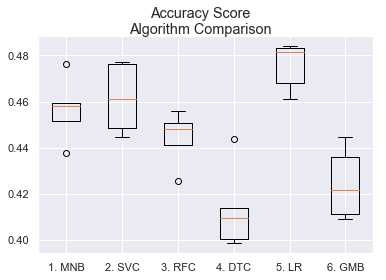

In [222]:
bow = supervisedModels(X_train_bow, y_train_bow)

_The BoWs model is able to predict the genre of sentences 47.57% of the time using the Logistic Regression algorithm._
_Let's run the test model to see if our predictions are on target with the model.  I will use the top 3 models for the test._

1. MNB: 0.386196 (0.012535)
2. SVC: 0.396196 (0.019961)
3. RFC: 0.360894 (0.018619)
4. DTC: 0.366192 (0.015592)
5. LR: 0.409894 (0.013672)
6. GMB: 0.373551 (0.016585)


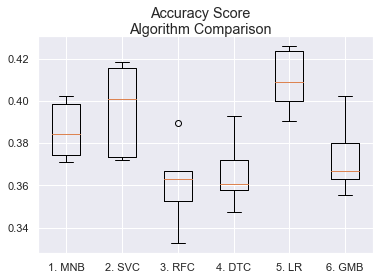

In [223]:
bow1Test = supervisedModels(X_test_bow,y_test_bow)

In [224]:
bow_cross_val1 =supervisedTest(X_train_bow,y_train_bow,X_test_bow,y_test_bow)

Multinomial NB 
confusion matrix 
 [[ 91 112  22  25   6   0]
 [ 23 470  39  38  14   1]
 [ 11 141  97  39   6   0]
 [ 12 190  31 105  11   4]
 [ 17 102  13  35  92   0]
 [ 14  64  22  23  11  17]]

holdout accuracy score:  0.4594309799789252

cross validation scores:  [0.39622642 0.4        0.407173   0.40889831]

               precision    recall  f1-score   support

      gospel       0.54      0.36      0.43       256
      hiphop       0.44      0.80      0.56       585
         pop       0.43      0.33      0.37       294
         r&b       0.40      0.30      0.34       353
      reggae       0.66      0.36      0.46       259
        rock       0.77      0.11      0.20       151

   micro avg       0.46      0.46      0.46      1898
   macro avg       0.54      0.38      0.39      1898
weighted avg       0.50      0.46      0.43      1898

----------------------------------------------------------

Logistic Regression 
confusion matrix 
 [[100  83  31  30   8   4]
 [ 39 430  4

_The BoWs test model accuracy scores: MNB 50%, LR 49% and SVC 48%. The weighted averages are not close to the cross validation scores from 39% to 42%.  So our model is overfit._

_The trained model scores for MNB: 45.67% with cross validation scores of 39% 40% and 41%.  Logistic Regression predicted 49% with validation scores of 42%._

_We will will use tf-idf on the model to see how it compares to BOWs._

----

#### **TFIDF**

1. MNB: 0.471445 (0.009596)
2. SVC: 0.455283 (0.008888)
3. RFC: 0.459677 (0.015654)
4. DTC: 0.448958 (0.011432)
5. LR: 0.472678 (0.009427)
6. GMB: 0.435953 (0.012205)


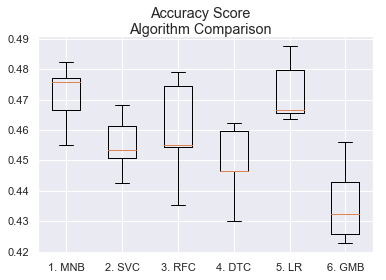

In [225]:
tf1= supervisedModels(X_traincv, y_train_tf)

_The TFIDF model is able to explain the variance 47.27% of the time using the LR algorithm._

#### For testing the model we will only explore MNB and LR the were the top 2 algorithms

1. MNB: 0.413054 (0.011850)
2. SVC: 0.399357 (0.022864)
3. RFC: 0.366156 (0.022046)
4. DTC: 0.364599 (0.020206)
5. LR: 0.415156 (0.022116)
6. GMB: 0.379346 (0.013616)


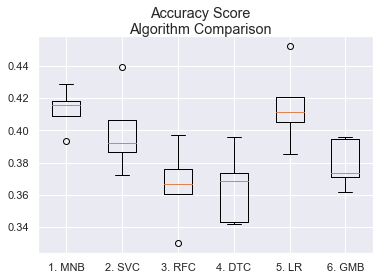

In [226]:
tfTest1= supervisedModels(X_testcv, y_test_tf)

In [227]:
tf_cross_val1 =supervisedTest(X_traincv, y_train_tf, X_testcv, y_test_tf)

Multinomial NB 
confusion matrix 
 [[100  93  23  22   9   9]
 [ 29 443  48  37  21   7]
 [ 15 120 105  39   9   6]
 [ 18 160  41 108  17   9]
 [ 21  92  20  31  92   3]
 [ 16  63  23  16  13  20]]

holdout accuracy score:  0.45732349841938885

cross validation scores:  [0.43186583 0.41473684 0.40084388 0.41949153]

               precision    recall  f1-score   support

      gospel       0.50      0.39      0.44       256
      hiphop       0.46      0.76      0.57       585
         pop       0.40      0.36      0.38       294
         r&b       0.43      0.31      0.36       353
      reggae       0.57      0.36      0.44       259
        rock       0.37      0.13      0.20       151

   micro avg       0.46      0.46      0.46      1898
   macro avg       0.46      0.38      0.40      1898
weighted avg       0.46      0.46      0.44      1898

----------------------------------------------------------

Logistic Regression 
confusion matrix 
 [[104  98  21  11  12  10]
 [ 29 452  

_The TFIDF test model accuracy scores: MNB 46%, LR 48% and SVC 47%. The weighted averages are not close to the cross validation scores from 39% to 42%.  So our model is overfit just like we saw using the BOWs._

### Summary of Supervised Learning

_There no clear winner between BOWs and TFIDF.  Both models were over fit.  For further analysis, I would tune the models using grid-search to see if I could improve the model.  Also it would be a good idea to sample the data of the sentence cleaned dataframe to make the data more balanced.

---

## **Unsupervised - Clustering**
    
    - Calculate the number of clusters using the elbow method and use for all cluster models
    - use TFIDF & BOWs on the sentences
    - Unsupervised learning to plot the clusters

In [228]:
from scipy.spatial.distance import cdist
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans,MiniBatchKMeans,MeanShift
from sklearn.cluster import SpectralClustering,AffinityPropagation
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.preprocessing import normalize

__Elbow method to determine the number of clusters__

In [229]:
#function to determine K
def kClusters(X):
    squaredSums = []
    K = range(1,15)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel = kmeanModel.fit(X)
        squaredSums.append(kmeanModel.inertia_)

    # Plot the elbow
    plt.plot(K, squaredSums, 'bx-')
    plt.xlabel('k')
    plt.ylabel('squaredSums')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [230]:
#Find the clusters and plot them
from sklearn.decomposition import TruncatedSVD## a form of PCA for NLP
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.decomposition import PCA

def clusterModels(X,y,k):
    fig, ax = plt.subplots(1,4, figsize=(20,6))
    models = []
    names = []
    plt_num = []

   
    '''# I have to normalize the data to get this to plot
    I first tried PCA but then used SVD and also reduced 
    the features one third'''

    # Normalize the data.
    svd = TruncatedSVD(75)#Number of features: 756
    lsa = make_pipeline(svd, Normalizer(copy=False))
    
    # Run SVD on the training data, then project the training data.
    X_lsa = lsa.fit_transform(X)
    
    bandwidth = estimate_bandwidth(X_lsa, quantile=0.2, n_samples=50)

    models.append((0,'KMeans', KMeans(n_clusters=k, init='k-means++')))
    models.append((1,'MeanShift', MeanShift(bandwidth=bandwidth, bin_seeding=True)))
    models.append((2,'Spectral', SpectralClustering(n_clusters=k)))
    models.append((3,'Affinity', AffinityPropagation()))

    for plt_num, name, model in models:  
        names.append(name)
        model.fit(X_lsa)
        labels = model.labels_

        ax[plt_num].set_title(name)
        ax[plt_num].scatter(X_lsa[:, 0], X_lsa[:, 1], c=labels)
        print(name)
        print(pd.crosstab(y, labels),'\n\n')     

#### Use elbow method to determine the number of clusters to use

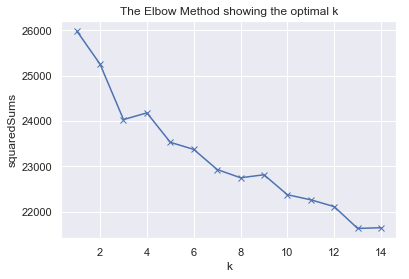

In [231]:
#BOWS
kClusters(X_train_bow)

#### Unsupervised learning on BOWs on the sentences with k=6

KMeans
col_0    0   1    2    3   4     5
genre                             
gospel  19  36   90   74  38   534
hiphop  74  89  155  226  98  1093
pop     58  44   73  126  38   562
r&b     90  43  106   74  58   615
reggae  28  13   88   84  20   562
rock    18  17   41   29  18   360 


MeanShift
col_0      0
genre       
gospel   791
hiphop  1735
pop      901
r&b      986
reggae   795
rock     483 


Spectral
col_0      0    1   2    3   4   5
genre                             
gospel   618   44  15   52  30  32
hiphop  1250  133  62  123  89  78
pop      618   50  50   79  76  28
r&b      718   47  73   55  54  39
reggae   636   10  26   72  36  15
rock     395   17  17   24  15  15 


Affinity
col_0   0    1    2    3    4    5    6    7    8    9   ...   305  306  307  \
genre                                                    ...                   
gospel    3    1   93    0    0    0    7   12    0    3 ...     0    2    0   
hiphop    0    3  118    1    1    0    6   27    7 

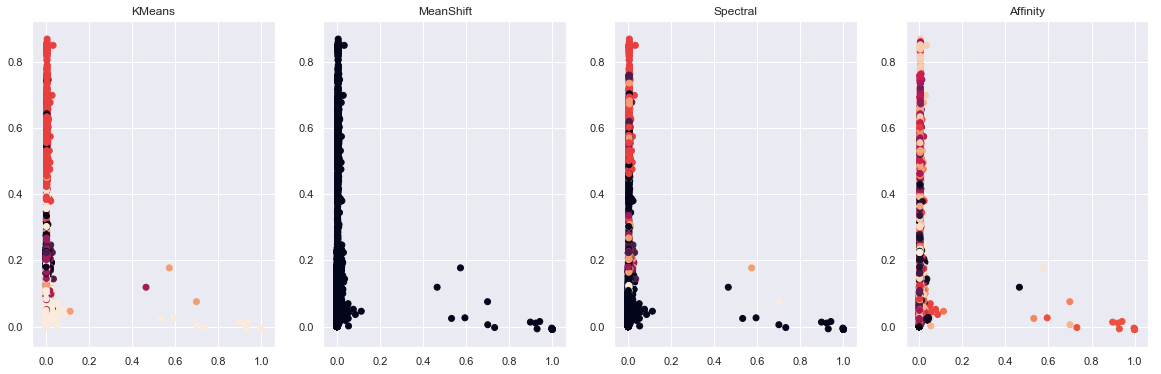

In [232]:
bowUnsupModels = clusterModels(X_train_bow,y_train_bow,6)

KMeans
col_0    0   1    2   3   4   5
genre                          
gospel  12  13  165  29  30   7
hiphop  39  19  379  47  66  35
pop      9  24  176  48  26  11
r&b     23  22  223  40  30  15
reggae   5  12  175  20  31  16
rock    11   7  110  10   6   7 


MeanShift
col_0     0
genre      
gospel  256
hiphop  585
pop     294
r&b     353
reggae  259
rock    151 


Spectral
col_0     0   1   2   3   4   5
genre                          
gospel  189  11  18  10  25   3
hiphop  433  14  47  34  47  10
pop     202  20  20   6  23  23
r&b     253  20  17  22  25  16
reggae  204  12   6   2  27   8
rock    123   7   5   8   5   3 


Affinity
col_0   0    1    2    3    4    5    6    7    8    9   ...   121  122  123  \
genre                                                    ...                   
gospel    2    0    1    0    1    6    3    7    0    1 ...     0    1    1   
hiphop   10    1   10   19    6   16    5   19    2    1 ...    12    1    4   
pop      16    3    0    4  

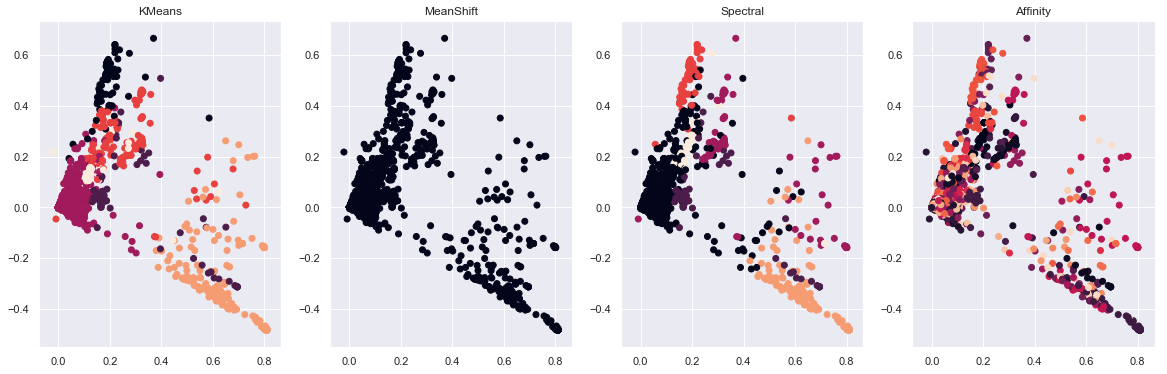

In [233]:
bowUnsupModelsTest = clusterModels(X_test_bow,y_test_bow,6)

_Unsupervised learning with BOWs feature was not able to cluster the sentences to specific genres.  All genres for each model are spread over all the clusters.  Mean shift put all the genres in one clusters.  This is not surprising because how do you know what sentence is a close match when focusing on distance._

----

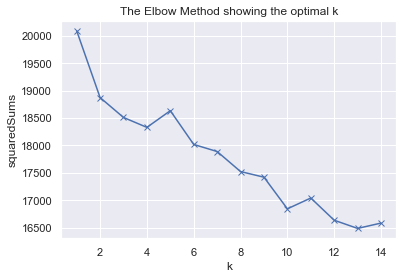

In [121]:
#TFIDF 
kClusters(X_traincv)

#### Unsupervised learning on TFIDF on the sentences with k =4

KMeans
col_0      0    1    2   3
genre                     
gospel   644   50   66  31
hiphop  1282  159  198  96
pop      609   83  129  80
r&b      711   74  133  68
reggae   634   35   89  37
rock     386   40   42  15 


MeanShift
col_0    0   1   2   3   4   5   6   7   8   9  ...  46  47  48  49  50  51  \
genre                                           ...                           
gospel  280  12  14  14   7  21  33  30  18  17 ...   2   1   3   4   1   0   
hiphop  620  58  50  70  89  56  76  36  32  22 ...   5   6   4   8   0   7   
pop     291  36  35  53  25  30  22  46  16  23 ...   2   0  12   0   0   0   
r&b     334  36  51  23  25  24  30  29  12  12 ...   8   4   3   0   0   0   
reggae  264  21  21  20  17   8  10  15  21  17 ...   1   3   5   1  10   0   
rock    192  10  13  11  19  15   3  14   7   8 ...   4   1   1   0   0   0   

col_0   52  53  54  55  
genre                   
gospel   0   1   3   6  
hiphop   8   0   2   3  
pop      0   0   1   6  
r&b   

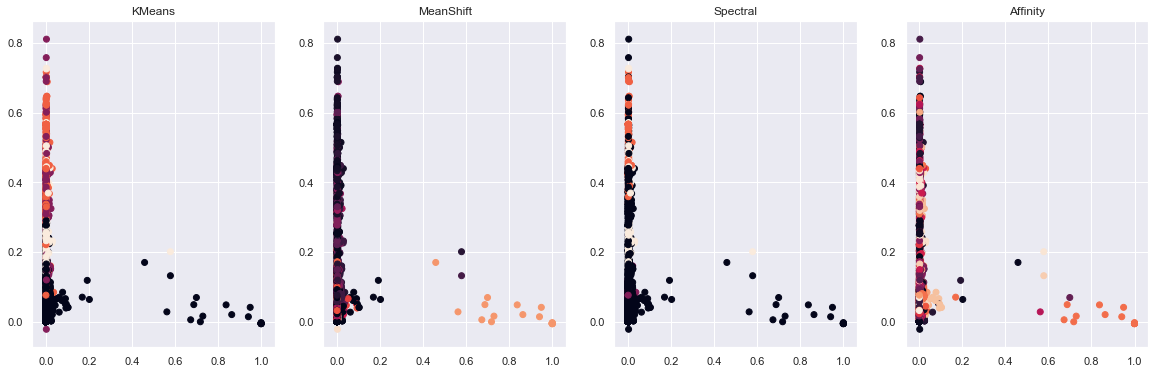

In [174]:
tfUnsupModels = clusterModels(X_traincv,y_train_tf,4)

KMeans
col_0     0   1   2   3
genre                  
gospel  229  12  11   4
hiphop  507  23  16  39
pop     253  12  22   7
r&b     304  13  22  14
reggae  230   6  15   8
rock    133   5   7   6 


MeanShift
col_0     0
genre      
gospel  256
hiphop  585
pop     294
r&b     353
reggae  259
rock    151 


Spectral
col_0    0    1   2   3
genre                  
gospel  11  224  12   9
hiphop  35  514  22  14
pop      5  261  11  17
r&b     16  303  12  22
reggae   2  240   4  13
rock     4  135   5   7 


Affinity
col_0   0    1    2    3    4    5    6    7    8    9   ...   127  128  129  \
genre                                                    ...                   
gospel    3    2    2    0    1    0    0    6    0   42 ...     2    0    1   
hiphop    9   23   15    1   11    8   13   15    0  104 ...     4    3    4   
pop       0    1    1    3    0    2    4    8    1   47 ...     0    0    3   
r&b       2    8    2    2    3    2    0    4    4   49 ...     2    2    3

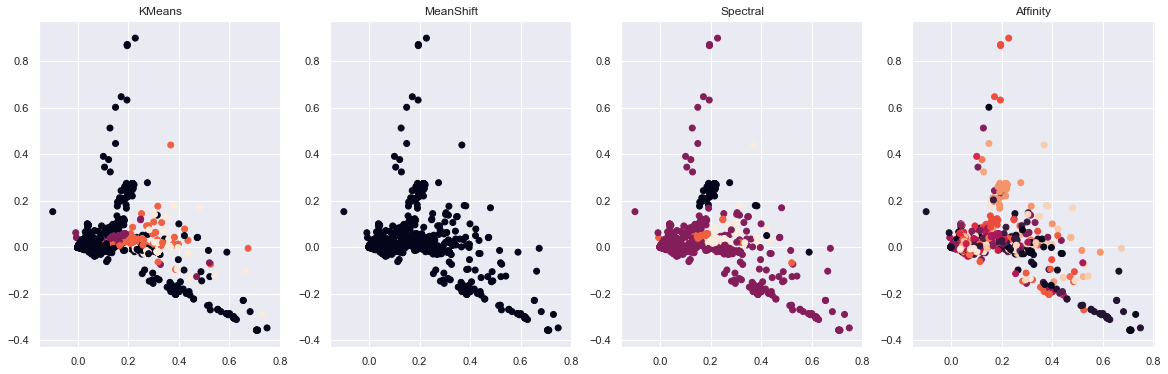

In [175]:
tfUnsupModelsTest = clusterModels(X_testcv,y_test_tf,4)

_Clustering when using TFIDF didn't explain the variance that well just like BOWs._

### Summary of Unsupervised Learning

_There were a total of 750 features.  We reduced the feature space to 75 using truncated svd.  Both BOWs and TFIDF are not able to cluster the sentences in the appropriate genre._

---

# **Part III - Prediction of genre by songs**

    - tfidf will be compared with both Unsupervised and Supervised Learning algorithms.

## Supervised Learning

In [234]:
wholeSong_df_clean.tail(1)

,lyrics,artist,genre
299,oh lord oh lord we lift you ooh we lift you up yeah yeah yeah raise my voice in testimony cause hes more than a friend to me gave my heart cause ...,donnie_mcclurkin,gospel


#### **BOWs - Train test split on the full song**

In [235]:
#get a list of string for the songs
wholeSong_df_clean['lyricString'] = wholeSong_df_clean.lyrics.T.tolist()

In [236]:
wholeSong_df_clean.tail(1)

,lyrics,artist,genre,lyricString
299,oh lord oh lord we lift you ooh we lift you up yeah yeah yeah raise my voice in testimony cause hes more than a friend to me gave my heart cause ...,donnie_mcclurkin,gospel,oh lord oh lord we lift you ooh we lift you up yeah yeah yeah raise my voice in testimony cause hes more than a friend to me gave my heart cause ...


In [237]:
from sklearn.model_selection import train_test_split

y = wholeSong_df_clean['genre']
X = wholeSong_df_clean.lyricString

X_train_bow2, X_test_bow2, y_train_bow2, y_test_bow2 = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=99)

In [238]:
vec = CountVectorizer(stop_words="english", 
                              analyzer='word', 
                              max_df=0.5, 
                              min_df=5, 
                              max_features=None)

X_train_bow2 =vec.fit_transform(X_train_bow2)
X_test_bow2 = vec.transform(X_test_bow2)

In [239]:
words= vec.get_feature_names()
#pd.DataFrame(X_train_bow2.todense(), columns=words)

-------

#### **TFIDF - Train test split on the full song**

In [240]:
wholeSong_df_clean=wholeSong_df_clean.drop(['lyricString'],axis=1)

In [241]:
wholeSong_df_clean.genre.value_counts()

reggae    50
pop       50
hiphop    50
gospel    50
rock      50
r&b       50
Name: genre, dtype: int64

In [242]:

y2 = wholeSong_df_clean['genre']
X2 = wholeSong_df_clean.lyrics
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, 
                                                        test_size = 0.25, 
                                                         random_state=99)

In [243]:
vectorizer2 = CountVectorizer(stop_words="english", 
                              analyzer='word', 
                              max_df=0.5, 
                              min_df=5, 
                              max_features=None)

In [244]:
X_train2cv = vectorizer2.fit_transform(X_train2)
feature_names2 = vectorizer.get_feature_names()
print('Number of features: ',len(feature_names2))
'''X_test_tf2 = tfidf2.transform(vectorTf)
X_test_tf2Df = pd.DataFrame(X_test_tf2.todense(), columns=features_names2)
X_test_tf2.shape'''

Number of features:  752


'X_test_tf2 = tfidf2.transform(vectorTf)\nX_test_tf2Df = pd.DataFrame(X_test_tf2.todense(), columns=features_names2)\nX_test_tf2.shape'

In [245]:
X_test2cv = vectorizer2.transform(X_test2)

In [246]:
#print(X_train2cv.shape,X_test2cv.shape)
print(X_traincv.shape, y_train2.shape, X_test2cv.shape, y_test2.shape)

(5691, 752) (225,) (75, 726) (75,)


------

#### BOW - Supervised learn on the full song

1. MNB: 0.564444 (0.093861)
2. SVC: 0.551111 (0.094699)
3. RFC: 0.488889 (0.050674)
4. DTC: 0.497778 (0.099975)
5. LR: 0.595556 (0.069424)
6. GMB: 0.568889 (0.045758)


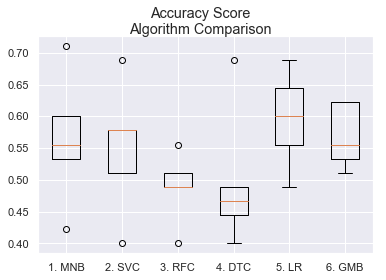

In [188]:
bowTest2 = supervisedModels(X_train_bow2,y_train_bow2)

1. MNB: 0.480000 (0.135974)
2. SVC: 0.373333 (0.032660)
3. RFC: 0.346667 (0.106667)
4. DTC: 0.386667 (0.088443)
5. LR: 0.400000 (0.059628)
6. GMB: 0.360000 (0.067987)


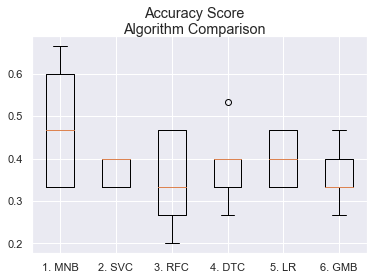

In [189]:
bow2test = supervisedModels(X_test_bow2,y_test_bow2)

In [211]:
bows_cross_val2 =supervisedTest(X_train_bow2,y_train_bow2, X_test_bow2,y_test_bow2)

Multinomial NB 
confusion matrix 
 [[11  0  0  1  2  1]
 [ 1  8  0  0  1  0]
 [ 0  0  3  7  0  3]
 [ 1  2  0  6  0  0]
 [ 0  3  1  4  7  1]
 [ 1  1  2  4  1  3]]

holdout accuracy score:  0.5066666666666667

cross validation scores:  [0.52380952 0.31578947 0.44444444 0.52941176]

               precision    recall  f1-score   support

      gospel       0.79      0.73      0.76        15
      hiphop       0.57      0.80      0.67        10
         pop       0.50      0.23      0.32        13
         r&b       0.27      0.67      0.39         9
      reggae       0.64      0.44      0.52        16
        rock       0.38      0.25      0.30        12

   micro avg       0.51      0.51      0.51        75
   macro avg       0.52      0.52      0.49        75
weighted avg       0.55      0.51      0.50        75

----------------------------------------------------------

Logistic Regression 
confusion matrix 
 [[10  0  0  0  0  5]
 [ 0  8  1  0  1  0]
 [ 0  0  4  7  0  2]
 [ 0  1  0  

_The model is overfit.  The cross validation scores are not consistant.  Logistic Regression has an average score of 40% but the cross validation scores are in a range of 32% to 59%. _

------

#### **TFIDF - Supervised learning on full song**

1. MNB: 0.564444 (0.093861)
2. SVC: 0.551111 (0.094699)
3. RFC: 0.528889 (0.078756)
4. DTC: 0.475556 (0.053702)
5. LR: 0.595556 (0.069424)
6. GMB: 0.577778 (0.057948)


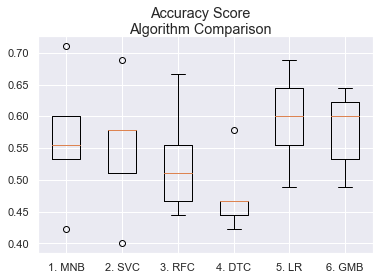

In [190]:
tfidf2 = supervisedModels(X_train2cv,y_train2)

1. MNB: 0.480000 (0.135974)
2. SVC: 0.373333 (0.032660)
3. RFC: 0.373333 (0.108321)
4. DTC: 0.400000 (0.133333)
5. LR: 0.400000 (0.059628)
6. GMB: 0.360000 (0.032660)


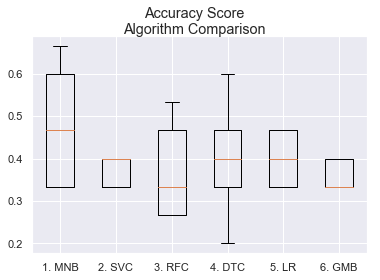

In [191]:
tfTest2 = supervisedModels(X_test2cv,y_test2)

_Again we see that using BOWs for features results in a better score._

In [247]:
tf_cross_val2 =supervisedTest(X_traincv, y_train_tf, X_testcv, y_test_tf)

Multinomial NB 
confusion matrix 
 [[100  93  23  22   9   9]
 [ 29 443  48  37  21   7]
 [ 15 120 105  39   9   6]
 [ 18 160  41 108  17   9]
 [ 21  92  20  31  92   3]
 [ 16  63  23  16  13  20]]

holdout accuracy score:  0.45732349841938885

cross validation scores:  [0.43186583 0.41473684 0.40084388 0.41949153]

               precision    recall  f1-score   support

      gospel       0.50      0.39      0.44       256
      hiphop       0.46      0.76      0.57       585
         pop       0.40      0.36      0.38       294
         r&b       0.43      0.31      0.36       353
      reggae       0.57      0.36      0.44       259
        rock       0.37      0.13      0.20       151

   micro avg       0.46      0.46      0.46      1898
   macro avg       0.46      0.38      0.40      1898
weighted avg       0.46      0.46      0.44      1898

----------------------------------------------------------

Logistic Regression 
confusion matrix 
 [[104  98  21  11  12  10]
 [ 29 452  

_The TFIDF model has using BOW geatures has a LR score of 59.6% but the cross validation scores are 32% to 59% and the average accuracy score is 40%.  This is the same for the other two models.  Again the models are overfitting._

-------

## **Unsupervised - Clustering**

__Find the best k(# of clusters) using the elbow method__


#### k for BOWs

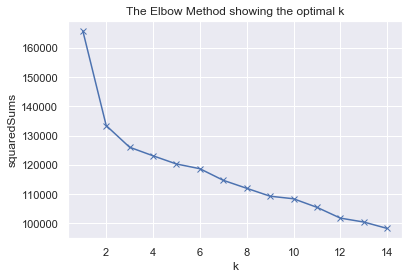

In [248]:
kClusters(X_train_bow2)

#### BOW - Unsupervised learn on the full song

KMeans
col_0    0   1  2   3   4  5
genre                       
gospel  12  12  1   2   2  6
hiphop   8   3  1   6  20  2
pop      8  11  5   7   2  4
r&b      8   7  4  11   5  6
reggae   8  13  3   3   2  5
rock     6  11  3   6   6  6 


MeanShift
col_0    0
genre     
gospel  35
hiphop  40
pop     37
r&b     41
reggae  34
rock    38 


Spectral
col_0    0   1   2   3  4  5
genre                       
gospel  16  14   2   0  2  1
hiphop   0  10  25   1  3  1
pop      0  24   1   5  7  0
r&b      2  15   3  16  4  1
reggae   6  18   2   3  3  2
rock     4  19   4   3  5  3 


Affinity
col_0   0   1   2   3   4   5   6   7   8   9  ...  26  27  28  29  30  31  \
genre                                          ...                           
gospel   0   1   0   1   0   2   0   0   0   1 ...   0   1   2   5   0   3   
hiphop   0   1   2   3   1   0   2   1   0   0 ...  14   0   0   1   1   0   
pop      1   0   1   0   0   1   0   3   0   2 ...   1   1   0   0   4   0   
r&b      0   0

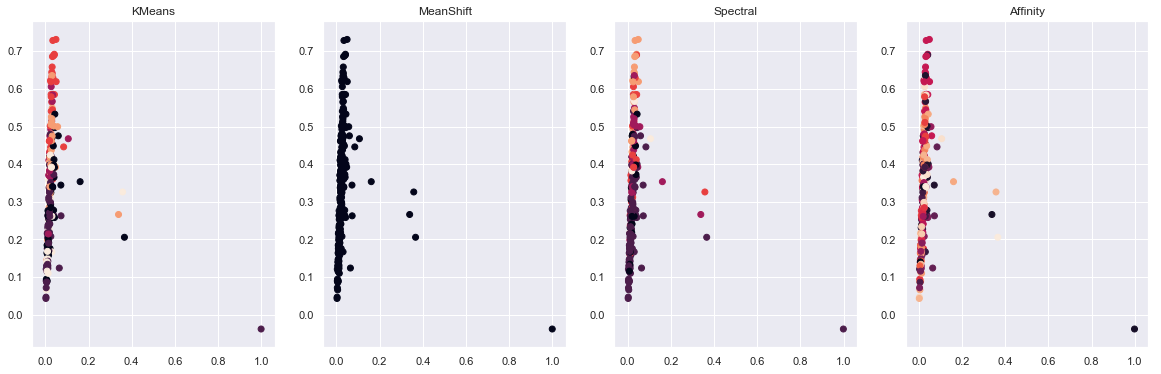

In [251]:
bow_2 = clusterModels(X_train_bow2,y_train_bow2,6)

KMeans
col_0   0  1  2  3  4  5
genre                   
gospel  3  5  1  3  0  3
hiphop  3  1  0  5  0  1
pop     1  5  3  3  0  1
r&b     2  4  2  1  0  0
reggae  1  3  1  5  1  5
rock    2  2  0  1  5  2 


MeanShift
col_0    0
genre     
gospel  15
hiphop  10
pop     13
r&b      9
reggae  16
rock    12 


Spectral
col_0   0  1  2   3  4  5
genre                    
gospel  0  1  0  12  0  2
hiphop  6  0  0   1  1  2
pop     2  3  4   3  1  0
r&b     2  2  3   0  2  0
reggae  1  1  2  12  0  0
rock    0  0  1   7  3  1 


Affinity
col_0   0   1   2   3   4   5   6   7   8   9   10  11  12  13
genre                                                         
gospel   2   3   0   0   1   1   2   2   1   1   2   0   0   0
hiphop   0   0   0   0   0   0   2   0   0   1   3   4   0   0
pop      0   0   0   0   0   2   2   5   0   1   0   0   3   0
r&b      0   0   0   0   0   0   0   4   0   1   0   1   1   2
reggae   0   0   1   1   2   2   2   1   4   0   1   0   1   1
rock     2   0   0 

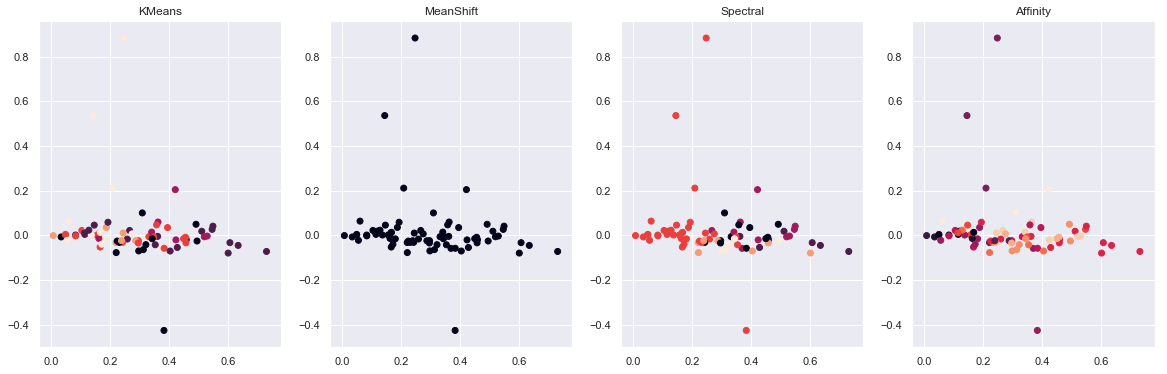

In [252]:
bow_2test = clusterModels(X_test_bow2,y_test_bow2,6)

------

#### k for TFIDF

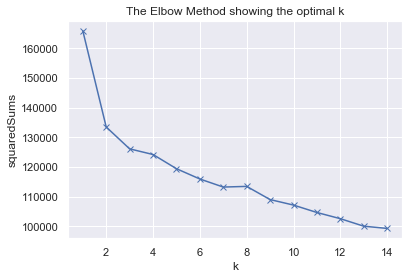

In [259]:
kClusters(X_train2cv)

#### TFIDF - Unsupervised learn on the full song

KMeans
col_0    0  1   2   3   4  5
genre                       
gospel   9  1  16   3   3  3
hiphop   8  1   1  22   1  7
pop     19  1   0   1   7  9
r&b      8  3   2   3  16  9
reggae  12  3   9   1   5  4
rock    17  3   3   5   4  6 


MeanShift
col_0    0
genre     
gospel  35
hiphop  40
pop     37
r&b     41
reggae  34
rock    38 


Spectral
col_0    0  1   2   3  4   5
genre                       
gospel   0  1  16   2  1  15
hiphop   2  3   0  24  1  10
pop      5  6   0   0  0  26
r&b     14  6   2   3  1  15
reggae   3  3   6   2  2  18
rock     5  3   2   4  3  21 


Affinity
col_0   0   1   2   3   4   5   6   7   8   9  ...  25  26  27  28  29  30  \
genre                                          ...                           
gospel   0   0   0   1   0   0   0   1   0   0 ...   3   4   0   3   0   1   
hiphop   0   2   1   0   3   2   0   2   1   0 ...   0   1   1   0   3   0   
pop      1   1   0   0   1   2   0   0   3   1 ...   0   0   4   0   1   1   
r&b      0   0

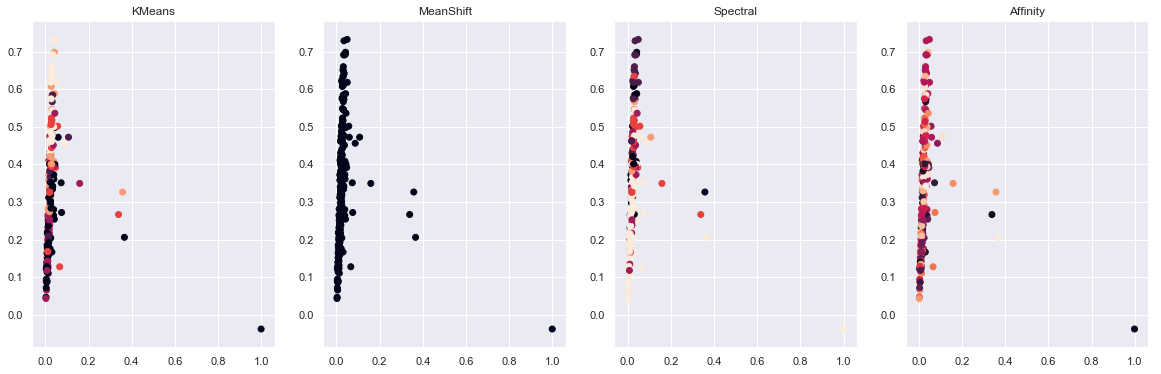

In [260]:
tf_2 = clusterModels(X_train2cv,y_train2,6)

KMeans
col_0   0  1  2  3  4  5
genre                   
gospel  0  6  0  2  4  3
hiphop  0  3  0  0  2  5
pop     0  1  2  4  4  2
r&b     1  0  1  3  3  1
reggae  3  3  0  4  1  5
rock    0  3  5  1  1  2 


MeanShift
col_0    0
genre     
gospel  15
hiphop  10
pop     13
r&b      9
reggae  16
rock    12 


Spectral
col_0   0   1  2  3  4  5
genre                    
gospel  0  12  2  0  0  1
hiphop  5   1  3  0  1  0
pop     2   3  0  4  1  3
r&b     2   0  0  3  2  2
reggae  2  11  0  2  0  1
rock    1   6  1  1  3  0 


Affinity
col_0   0   1   2   3   4   5   6   7   8   9   10  11  12  13
genre                                                         
gospel   2   3   0   0   1   1   2   2   1   1   2   0   0   0
hiphop   0   0   0   0   0   0   2   0   0   1   3   4   0   0
pop      0   0   0   0   0   2   2   5   0   1   0   0   3   0
r&b      0   0   0   0   0   0   0   4   0   1   0   1   1   2
reggae   0   0   1   1   2   2   2   1   4   0   1   0   1   1
rock     2   0   0 

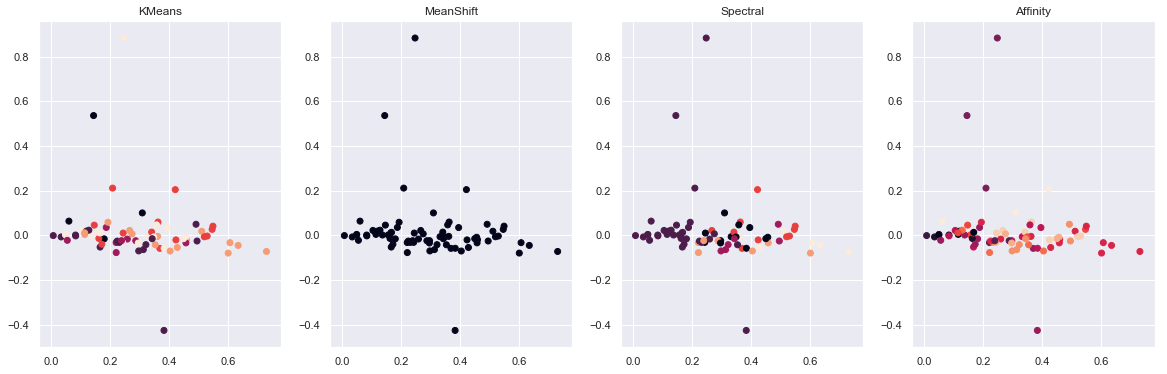

In [261]:
tf_2 = clusterModels(X_test2cv,y_test2,6)

_When predicting the genre against the whole song.  We are not able to cluster the genre of the songs.

---

# Part IV - Dimensionality reduction 

### LSA - analysis on the whole song

In [262]:
def svdReduction(Xtrain):    
    #Our SVD data reducer.  We are going to reduce the feature space from 750 to 75.
    svd= TruncatedSVD(75)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    # Run SVD on the training data, then project the training data.
    X_train_lsa = lsa.fit_transform(Xtrain)#xtrain

    # Calculate predicted values.
    y_pred = KMeans(n_clusters=6, random_state=99).fit_predict(X_train_lsa) 
    
    variance_explained=svd.explained_variance_ratio_
    total_variance = variance_explained.sum()
    print("Percent variance captured by all components:",total_variance*100)

    #Looking at what sorts of paragraphs our solution considers similar, for the first 10 identified topics
    lsa_component=pd.DataFrame(X_train_lsa,index=X_train2)
    for i in range(10):
        print('Component {}:'.format(i))
        print(lsa_component.loc[:,i].sort_values(ascending=False)[0:10][0])
    
    plt.hist(variance_explained, bins=50)
    plt.show()

#### **BOWs**

Percent variance captured by all components: 87.77389279163059
Component 0:
0.999074114824066
Component 1:
0.7318110711352589
Component 2:
0.5331765593142465
Component 3:
0.8198003235340473
Component 4:
0.6028151999042728
Component 5:
0.43708568799300296
Component 6:
0.6946850477378146
Component 7:
0.6804226056220808
Component 8:
0.4732909896694184
Component 9:
0.4543805482829954


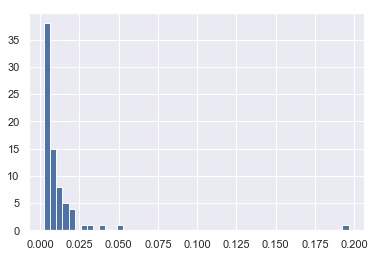

In [263]:
bowSVD = svdReduction(X_train_bow2)

#### **TFIDF**

Percent variance captured by all components: 87.77143935293083
Component 0:
0.9990743986987749
Component 1:
0.7316212219474834
Component 2:
0.5330132863369141
Component 3:
0.8202209755693904
Component 4:
0.6024219035563327
Component 5:
0.4370981322469749
Component 6:
0.6947038431882195
Component 7:
0.6803807594565552
Component 8:
0.4732618522591215
Component 9:
0.4543974201808319


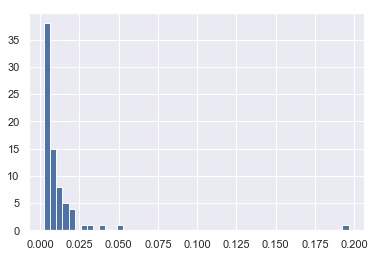

In [264]:
tfSVD = svdReduction(X_train2cv)

_A reduction of the feature space from 750 to 75._


_BOWs_
_Percent variance captured by all components: 87.77389279163059_


_TFIDF_
_Percent variance captured by all components: 87.77143935293083_

_The graph and data shows the amount of variance explained for each of the 75 components. For example, component 0 (~38) components  explains 0.999 or very little of the data and for component 1(~25) explains 0.732 of the data.  The components for both BOWs and TFIDF are very similar._


----

### LDA analysis on the whole song

analysis on the whole song

In [265]:
from sklearn.decomposition import LatentDirichletAllocation

In [266]:
vectorizer3 = CountVectorizer(stop_words="english", 
                              analyzer='word', 
                              max_df=0.5, 
                              min_df=5, 
                              max_features=None)

In [267]:
vec3= vectorizer3.fit_transform(wholeSong_df_clean['lyrics'])

In [268]:
LDA = LatentDirichletAllocation(n_components=6,random_state=99)

In [269]:
# This can take awhile, we're dealing with a large amount of documents!
LDA.fit(vec3)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=6, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=99, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [270]:
y_pred_lda = KMeans(n_clusters=6, random_state=99).fit_predict(vec3) 

In [271]:
print('number of features: ',len(vectorizer3.get_feature_names()))## get all the features

number of features:  919


In [272]:
wholeSong_df_clean.head(1)

,lyrics,artist,genre
0,it aint even cold outside not where im from feeling like its midjuly under the sun my jacket dont get no love no hats and no gloves not even a c...,ariana_grande,pop


In [274]:
combine=wholeSong_df_clean.reset_index().drop(['index'],axis=1).join(pd.DataFrame(y_pred_lda))
combine1=wholeSong_df_clean.join(pd.DataFrame(y_pred_lda))

combine.columns=['lyrics','artist','LDATopic','KMeans']
combine1.columns=['lyrics','artist','LDA_Topic','KCluster']

combine['count']=1
combine1['count']=1

grouped1=combine1[['LDA_Topic','KCluster','count']].groupby(['LDA_Topic','KCluster']).agg({'count':'sum'}).reset_index()


grouped1.sort_values(['LDA_Topic','count'], ascending=[True,False])

,LDA_Topic,KCluster,count
1,gospel,5,49
0,gospel,0,1
3,hiphop,1,28
4,hiphop,5,20
2,hiphop,0,2
9,pop,5,40
5,pop,0,7
6,pop,1,1
7,pop,2,1
8,pop,4,1


In [275]:
pd.crosstab(combine1['KCluster'], combine1['LDA_Topic'])

LDA_Topic,gospel,hiphop,pop,r&b,reggae,rock
KCluster,,,,,,
0,1,2,7,5,2,1
1,0,28,1,4,1,0
2,0,0,1,0,0,0
3,0,0,0,2,0,0
4,0,0,1,0,0,0
5,49,20,40,39,47,49


Kmean with LDA has predicted that most of the data is in cluster 5.  This is similar the other unsupervised models.

In [276]:
LDA.components_## these are the number of Topics picked

array([[ 0.16681123,  0.16666679, 13.11251615, ...,  4.88651955,
        79.02221655, 40.46103531],
       [ 9.76630333,  4.90298278,  0.16797315, ..., 12.88101004,
        80.06044756,  6.17986716],
       [ 0.16674942,  1.21661449,  0.16728154, ...,  1.94302333,
        87.65011556, 15.95268139],
       [ 0.16717307,  0.16819131,  0.16901195, ...,  3.24065529,
         9.5608525 ,  0.16699849],
       [ 4.22145362,  0.16697963,  3.21560839, ...,  6.37540175,
        26.17410469,  1.32195555],
       [ 1.51150932,  0.37856501,  0.16760882, ...,  3.67339004,
        19.53226314,  3.91746208]])

In [278]:
## find top 50 words
for index,topic in enumerate(LDA.components_):
    print(f'The top 50 words for topic number {index}')
    print([vectorizer3.get_feature_names()[i] for i in topic.argsort()[-50:]])
    print('\n')

The top 50 words for topic number 0
['thing', 'best', 'boy', 'trust', 'jesus', 'come', 'time', 'dance', 'world', 'alright', 'crazy', 'ride', 'let', 'need', 'high', 'sing', 'heart', 'wait', 'youve', 'forget', 'want', 'say', 'lift', 'gonna', 'life', 'things', 'lord', 'ill', 'aint', 'like', 'repeat', 'run', 'lets', 'hey', 'make', 'cause', 'girl', 'youre', 'away', 'praise', 'chorus', 'yeah', 'feel', 'got', 'ooh', 'baby', 'way', 'wanna', 'love', 'oh']


The top 50 words for topic number 1
['boy', 'yea', 'money', 'oh', 'missy', 'say', 'uh', 'little', 'eve', 'world', 'think', 'bad', 'wanna', 'tell', 'wit', 'stop', 'bitch', 'gonna', 'hit', 'thats', 'thing', 'burn', 'play', 'yeah', 'shake', 'need', 'chorus', 'yall', 'niggas', 'em', 'shit', 'real', 'youre', 'want', 'did', 'come', 'man', 'girl', 'let', 'ya', 'make', 'yo', 'baby', 'nigga', 'right', 'cause', 'aint', 'love', 'got', 'like']


The top 50 words for topic number 2
['like', 'hes', 'oh', 'lord', 'inside', 'hurt', 'kiss', 'die', 'turn', 'p

_It is hard to tell which genre belongs to a cluster. I will plot them to see if we can tell better_

In [279]:
topic_results = LDA.transform(vec3)##transform the original document term matrix to get back the topic for each document

In [280]:
wholeSong_df_clean['topic'] = topic_results.argmax(axis=1)

In [281]:
wholeSong_df_clean.head()

,lyrics,artist,genre,topic
0,it aint even cold outside not where im from feeling like its midjuly under the sun my jacket dont get no love no hats and no gloves not even a c...,ariana_grande,pop,0
1,theres a fire starting in my heart reaching a fever pitch and its bringing me outta the dark finally i can see you crystal clear go ahead and sell...,ariana_grande,pop,2
2,every day im grindin i dont even get a weekend been livin my life in black and white no sleeping so tonight im gonna flip it like in a new york mi...,ariana_grande,pop,1
3,ariana grande i love the way you make me feel i love it i love it i love the way you make me feel i love it i love it mac miller say im thinking ...,ariana_grande,pop,0
4,someday ill let you in treat you right drive you outta your mind ooh you never met a chick like me burn so bright im gonna make you bliiind alwa...,ariana_grande,pop,1


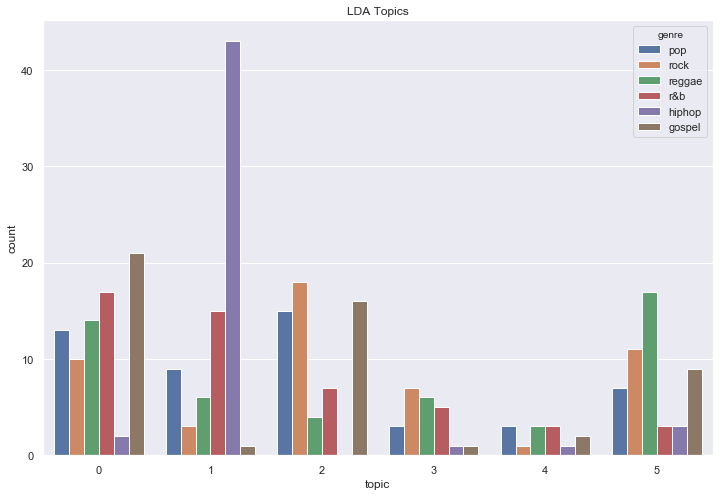

In [282]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(x='topic',data=wholeSong_df_clean, hue='genre')
plt.title('LDA Topics')
plt.show()

_If we graph the topics_

    topic 0 is all genres
    topic 1 is mainly hiphop
    topic 2 is everything except hiphop
    topic 3 is all genres
    topic 4 is all genres
    topic 5 id all genres

# Conclusion

For the suprevised modeling and testing:

BOW on sentences - MNB 45.7%(50% test) and LR 47.57%(49% test) for sentences
BOW on whole song - MNB 56.44%(48% test) and LR 59.56%(40% test) for the whole songs
    
TFIDF on sentences - MNB 47.14(46%) and LR 45.53%(48% test) with for sentences
TFIDF on whole song - MNB 54.44%(test 46%) and LR 59.56%(48% test) for whole songs
        

One way that I see the might be the issue with the model is that the data set can be a bit larger by adding more songs for each artist and also I would like to add a few more genres.  Also I think the data cleaning with regex could be refined a lot more. 

The unsupervised models didn't do that well with predicting the genre.  It is hard to tell if the words are related but I thought the model would at least capture some unique words like 'jah' from reggae and make it a bit more accurate.  But clusting is not the way to go for this model.  

The LDA unsupervised model has also grouped most of the songs into one cluster.  If we look at the top 50 words of each cluster, we are not able to determine the cluster of genres. 

When dimensionality reduction was applied to the model, we can see the components explain very little of the 75 components. 